## 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib_inline.backend_inline import set_matplotlib_formats

from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# 1. 데이터 합치기

In [2]:
part_earn = pd.read_csv('/Users/t2023-m0052/Documents/GitHub/final_project/data/참여적립조인.csv')
part_earn.head() 

,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
part_earn

,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,...,0,122.32.24.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854861,16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,...,0,13.125.212.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854862,16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,...,NaN,43.206.110.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854863,16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,...,0,115.40.102.142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [330]:
cl_part_earn = part_earn.drop(['Unnamed: 0', 'click_key', 'click_day', 'regdate'], axis=1)

KeyboardInterrupt: 

In [ ]:
cl_part_earn.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'ads_code', 'advid', 'adv_cost', 'earn_cost',
       'ctit', 'conversion'],
      dtype='object')

In [4]:
domain = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/광고도메인리스트.csv")
domain.head()

,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활


In [7]:
domain.columns

Index(['Unnamed: 0', 'ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_icon_img', 'ads_summary',
       'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min',
       'ads_age_max', 'ads_os_type', 'ads_contract_price', 'ads_reward_price',
       'ads_order', 'ads_rejoin_type', 'regdate', 'domain'],
      dtype='object')

In [8]:
cl_domain = domain.drop(['Unnamed: 0','ads_icon_img', 'ads_summary', #'ads_sdate', 
                         'ads_age_min', 'ads_age_max',  'ads_contract_price', 'ads_reward_price'], axis = 1)

In [9]:
cl_domain.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate',
       'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate', 'domain'],
      dtype='object')

In [10]:
cl_part_earn.isnull().sum()

ads_idx                  0
dvc_idx                  0
mda_idx                  0
pub_sub_rel_id           0
contract_price           0
media_price              0
click_time               0
click_date               0
exp_day                  0
network            2501362
user_ip                  9
rwd_idx           15379915
ads_code          15379915
advid             15387086
adv_cost          15379915
earn_cost         15379915
ctit              15379915
conversion               0
dtype: int64

In [11]:
machesa = cl_part_earn.merge(cl_domain, on = ['ads_idx'], how='left')
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'ads_code_x', 'advid', 'adv_cost', 'earn_cost',
       'ctit', 'conversion', 'ads_code_y', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain'],
      dtype='object')

In [12]:
machesa.isnull().sum() / machesa.shape[0]

ads_idx            0.000000e+00
dvc_idx            0.000000e+00
mda_idx            0.000000e+00
pub_sub_rel_id     0.000000e+00
contract_price     0.000000e+00
media_price        0.000000e+00
click_time         0.000000e+00
click_date         0.000000e+00
exp_day            0.000000e+00
network            1.484059e-01
user_ip            5.339705e-07
rwd_idx            9.124911e-01
ads_code_x         9.124911e-01
advid              9.129166e-01
adv_cost           9.124911e-01
earn_cost          9.124911e-01
ctit               9.124911e-01
conversion         0.000000e+00
ads_code_y         0.000000e+00
aff_idx            0.000000e+00
adv_idx            0.000000e+00
ads_type           0.000000e+00
ads_category       0.000000e+00
ads_name           0.000000e+00
ads_save_way       0.000000e+00
ads_day_cap        0.000000e+00
ads_sdate          0.000000e+00
ads_edate          0.000000e+00
ads_os_type        0.000000e+00
ads_order          0.000000e+00
ads_rejoin_type    0.000000e+00
regdate 

In [13]:
machesa.drop(['ads_code_x'], axis = 1, inplace=True)
machesa.rename(columns={"ads_code_y":"ads_code"}, inplace=True)
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain'],
      dtype='object')

# 전처리

## 2. 도메인 분포 만들기

In [226]:
domain_dummies = pd.get_dummies(machesa['domain'], prefix = "domain")
df_domain = pd.concat([machesa[['mda_idx']], domain_dummies], axis=1)
domain_features = df_domain.groupby('mda_idx').sum()
domain_features.isna().sum()

domain_게임         0
domain_교육         0
domain_금융         0
domain_기타         0
domain_미디어/컨텐츠    0
domain_뷰티         0
domain_비영리/공공     0
domain_생활         0
domain_식당/카페      0
domain_식음료        0
domain_운동/스포츠     0
domain_운세         0
domain_의료/건강      0
domain_채용         0
domain_커머스        0
dtype: int64

In [227]:
# 비율로 정규화
domain_features = domain_features.div(domain_features.sum(axis=1), axis=0)
domain_features.head()

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,0.808241,0.000000,0.017084,0.000000,0.000228,0.000000,0.031406,0.006363,0.000000,0.002766,0.000000,0.00000,0.000564,0.000000,0.133347
14,0.458526,0.000000,0.041999,0.000672,0.185871,0.070090,0.000000,0.073711,0.000000,0.075941,0.000000,0.00000,0.056746,0.010476,0.025967
18,0.556115,0.000000,0.153330,0.000000,0.179500,0.000000,0.000000,0.103506,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.007549
22,0.446764,0.000192,0.141035,0.000000,0.191542,0.006358,0.057741,0.034395,0.000348,0.013652,0.004403,0.00048,0.029536,0.037862,0.035691
26,0.623894,0.000000,0.060472,0.000000,0.029499,0.000000,0.000000,0.169617,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.116519


## 3. 광고유형 분포

In [228]:
type_dummies = pd.get_dummies(machesa['ads_type'], prefix='type')
df_type = pd.concat([machesa['mda_idx'], type_dummies], axis = 1)
type_features = df_type.groupby('mda_idx').sum()
type_features = type_features.div(type_features.sum(axis = 1), axis = 0)
type_features

,type_1,type_2,type_3,type_4,type_5,type_7,type_9,type_10,type_11,type_12
mda_idx,,,,,,,,,,
12,0.789712,0.099510,0.110752,0.0,0.000026,0.000000,0.0,0.00000,0.0,0.0
14,0.366280,0.106155,0.308106,0.0,0.044949,0.040230,0.0,0.13428,0.0,0.0
18,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
22,0.493720,0.180409,0.288345,0.0,0.002447,0.035079,0.0,0.00000,0.0,0.0
26,0.126844,0.420354,0.452802,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
1051,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
1055,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,1.0


## 4. 광고 카테고리 분포

In [229]:
category_dummies = pd.get_dummies(machesa['ads_category'], prefix='category')
df_category = pd.concat([machesa['mda_idx'], category_dummies], axis = 1)
category_features = df_category.groupby('mda_idx').sum()
category_features = category_features.div(category_features.sum(axis = 1), axis = 0)
category_features

,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
mda_idx,,,,,,,,,,,,
12,0.055038,0.263231,0.570952,0.014748,0.0,0.000000,0.0,0.000000,0.096030,0.000000,0.0,0.000000
14,0.000000,0.202447,0.269988,0.250451,0.0,0.123002,0.0,0.000283,0.150455,0.003374,0.0,0.000000
18,0.000000,0.000000,0.000000,0.000000,0.0,0.660795,0.0,0.000000,0.334843,0.004362,0.0,0.000000
22,0.154484,0.066331,0.453338,0.092532,0.0,0.002675,0.0,0.003371,0.222482,0.004787,0.0,0.000000
26,0.000000,0.000000,0.547198,0.000000,0.0,0.234513,0.0,0.000000,0.206490,0.011799,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000
1051,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1055,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000


In [309]:
ad_category = machesa.groupby(['ads_category']).size().reset_index()
ad_category['ratio'] = ad_category[0]/ machesa.shape[0]
ad_category

,ads_category,0,ratio
0,0,126837,0.007525
1,1,579558,0.034385
2,2,2626057,0.155804
3,3,107930,0.006403
4,4,461730,0.027394
5,5,12512623,0.742375
6,6,16862,0.001000
7,7,14980,0.000889
8,8,216208,0.012828
9,10,140463,0.008334


In [311]:
ad_category = machesa[machesa.rwd_idx.notna()].groupby(['ads_category']).size().reset_index()
ad_category['ratio'] = ad_category[0]/ machesa[machesa.rwd_idx.notna()].shape[0]
ad_category

,ads_category,0,ratio
0,0,68029,0.046123
1,1,168463,0.114216
2,2,875132,0.593330
3,3,42175,0.028594
4,4,269652,0.182821
5,5,1400,0.000949
6,6,3402,0.002307
7,7,279,0.000189
8,8,16825,0.011407
9,10,263,0.000178


In [308]:
category_features.mean()

category_0     0.045470
category_1     0.275878
category_2     0.260285
category_3     0.087578
category_4     0.060491
category_5     0.043797
category_6     0.001444
category_7     0.018733
category_8     0.104899
category_10    0.027899
category_11    0.034135
category_13    0.039392
dtype: float64

## 5. 규모 정보 (합계 / 평균)

클릭

In [230]:
## 이걸로 사용하기 !! 광고 집행 건수는 idx nunique값이라
scale_features = machesa.groupby('mda_idx').agg({
    'contract_price':['mean', 'median', 'sum', 'max', 'min'],
    'media_price':['mean', 'median', 'sum', 'max', 'min'],
    'adv_cost': ['mean', 'median', 'sum', 'max', 'min'],
    'earn_cost':['mean', 'median', 'sum', 'max', 'min'],
    'ads_idx':'nunique'# ,
    # 'device'
    })
scale_features

contract_price                                    media_price          \
                  mean   median        sum    max    min         mean  median   
mda_idx                                                                         
12          267.335255    180.0   62138872   2000    130   211.075513   150.0   
14         1920.342390    230.0  162773982  30000    170  1408.739662   160.0   
18        12072.960242   7800.0   71966916  33600   1200  8736.873008  5800.0   
22          333.194745    190.0   27773448  33600    150   238.063727   150.0   
26         2366.755162    280.0    1604660  20400    190  1716.622419   230.0   
...                ...      ...        ...    ...    ...          ...     ...   
1050         16.000000     16.0         16     16     16    11.000000    11.0   
1051          3.000000      3.0          3      3      3     2.000000     2.0   
1055      19646.333333  14757.0      58939  29425  14757   720.000000   515.0   
1059          2.000000      2.0         12      2      2     2.000000     2.0   
1061         20.444444      5.0        184    150      2    16.000000     5.0   

                                ... adv_cost                               \
               sum    max  min  ...   median         sum      max     min   
mda_idx                         ...                                         
12        49061970   1000   90  ...    180.0  16180208.0   2000.0   130.0   
14       119409000  22000  120  ...    190.0   9934357.0  30000.0   170.0   
18        52080500  25000  900  ...   1200.0    717016.0  21600.0  1200.0   
22        19843802  25000  100  ...    190.0   8605200.0  14000.0   150.0   
26         1163870  14000  170  ...    280.0     17170.0    280.0   190.0   
...            ...    ...  ...  ...      ...         ...      ...     ...   
1050            11     11   11  ...     16.0        16.0     16.0    16.0   
1051             2      2    2  ...      NaN         0.0      NaN     NaN   
1055          2160   1130  515  ...      NaN         0.0      NaN     NaN   
1059            12      2    2  ...      NaN         0.0      NaN     NaN   
1061           144    110    2  ...      5.0        19.0      5.0     2.0   

           earn_cost                                    ads_idx  
                mean median         sum      max    min nunique  
mda_idx                                                          
12        158.872170  150.0  13176540.0   1000.0   90.0      24  
14        313.310273  150.0   7200810.0  22000.0  120.0      59  
18       2138.600000  900.0    534650.0  16200.0  900.0      23  
22        172.100079  120.0   6063430.0  10500.0  100.0     166  
26        206.857143  230.0     14480.0    230.0  170.0      19  
...              ...    ...         ...      ...    ...     ...  
1050       11.000000   11.0        11.0     11.0   11.0       1  
1051             NaN    NaN         0.0      NaN    NaN       1  
1055             NaN    NaN         0.0      NaN    NaN       2  
1059             NaN    NaN         0.0      NaN    NaN       1  
1061        3.800000    5.0        19.0      5.0    2.0       3  

[189 rows x 21 columns]

count     189.000000
mean      115.333333
std       561.917661
min         1.000000
25%         9.000000
50%        23.000000
75%        28.000000
max      6563.000000
Name: ads_idx, dtype: float64


<Axes: ylabel='ads_idx'>

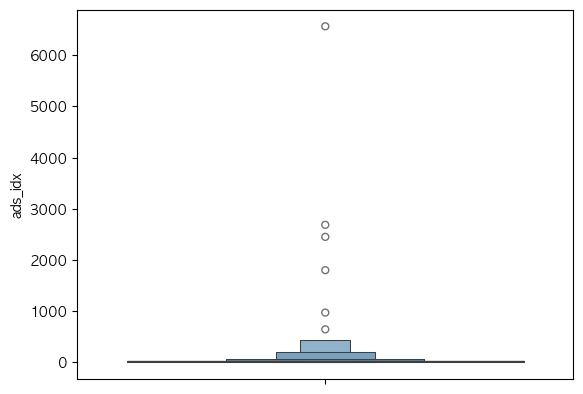

In [231]:
print(machesa.groupby('mda_idx')['ads_idx'].nunique().describe())
sns.boxenplot(machesa.groupby('mda_idx')['ads_idx'].nunique()) # 제일 광고 집행 건수가 많은 563


count     189.000000
mean      114.751323
std       561.563250
min         1.000000
25%         9.000000
50%        22.000000
75%        28.000000
max      6562.000000
Name: ads_code, dtype: float64


<Axes: ylabel='ads_code'>

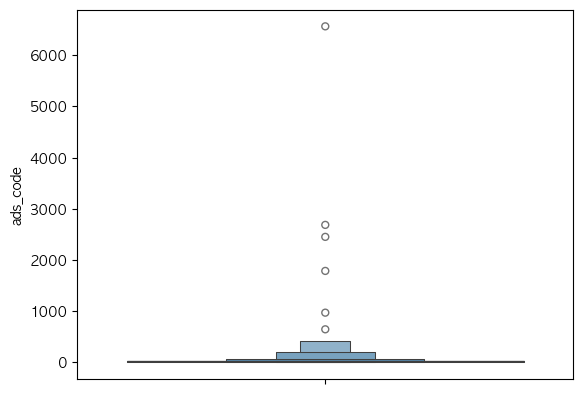

In [232]:
## pd.options.display.float_format = '{:.5f}'.format  # .5 부분은 소숫점 자리수
print(machesa.groupby('mda_idx')['ads_code'].nunique().describe())
sns.boxenplot(machesa.groupby('mda_idx')['ads_code'].nunique()) # 제일 광고 집행 건수가 많은 563

In [233]:
print(sum(scale_features['ads_idx']['nunique']))
print(domain.shape[0])

21798
9517


### 규모 나누기

In [234]:
def separate_scale(x):
    '''
    매체사 규모를 나누는 함수
    '''
    if x < 11:
        return '테스트형 매체사'
    elif x <= 50:
        return '소규모 운영'
    elif x <= 200:
        return '중간 규모'
    else: # x <= 2000:
        return '대규모 운영'

    
scale_features['ads_idx']['scale_label'] = scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x))
scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x)).reset_index().value_counts('nunique')

/var/folders/4n/w27drm2j3_v05ss9qbg_6qsc0000gn/T/ipykernel_20060/4000947897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_features['ads_idx']['scale_label'] = scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x))


nunique
소규모 운영      100
테스트형 매체사     55
중간 규모        22
대규모 운영       12
Name: count, dtype: int64

### user ip, device id

In [235]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain', 'nolimit_duration', 'duration_days'],
      dtype='object')

In [236]:
print(machesa.groupby('mda_idx')[['ads_idx', 'user_ip', 'dvc_idx']].nunique().describe())
look_scale = machesa.groupby('mda_idx')[['ads_idx', 'user_ip', 'dvc_idx']].nunique().reset_index()
look_scale

           ads_idx        user_ip        dvc_idx
count   189.000000     189.000000     189.000000
mean    115.333333    5109.185185    6261.005291
std     561.917661   14174.362751   19113.594425
min       1.000000       1.000000       1.000000
25%       9.000000      41.000000      23.000000
50%      23.000000    1622.000000    1764.000000
75%      28.000000    4400.000000    3840.000000
max    6563.000000  113648.000000  169122.000000


,mda_idx,ads_idx,user_ip,dvc_idx
0,12,24,41747,75700
1,14,59,33285,31834
2,18,23,3244,2825
3,22,166,23495,37668
4,26,19,418,402
...,...,...,...,...
184,1050,1,1,1
185,1051,1,1,1
186,1055,2,2,1
187,1059,1,5,1


In [237]:
def separate_scale(x):
    '''
    매체사 규모를 나누는 함수
    '''
    if x < 11:
        return 1 # '테스트형 매체사'
    elif x <= 50:
        return 2 # '소규모 운영'
    elif x <= 200:
        return 3 # '중간 규모'
    else: # x <= 2000:
        return 4 # '대규모 운영'

def separate_user_scale(x):
    '''
    매체사 사용자 규모를 나누는 함수
    '''
    if x < 1000:
        return 1 # 소규모
    elif x < 10000:
        return 2 # 중규모
    else:
        return 3 # 대규모
    
look_scale['ads_scale_index'] = look_scale['ads_idx'].apply(separate_scale)
look_scale['dvc_scale_index'] = look_scale['dvc_idx'].apply(separate_user_scale)
look_scale.value_counts(['ads_scale_index', 'dvc_scale_index'])

ads_scale_index  dvc_scale_index
2                2                  74
1                1                  42
2                1                  20
3                1                  13
1                2                  10
2                3                   6
4                1                   6
3                2                   5
4                2                   5
3                3                   4
1                3                   3
4                3                   1
Name: count, dtype: int64

<Axes: xlabel='ads_scale_index', ylabel='dvc_scale_index'>

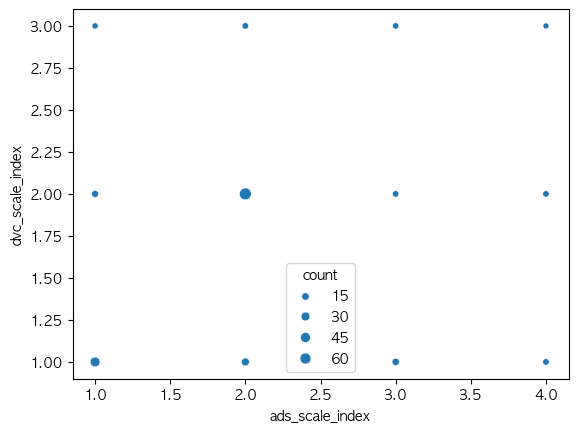

In [238]:
df = look_scale.value_counts(['ads_scale_index', 'dvc_scale_index']).reset_index()
sns.scatterplot(x= df['ads_scale_index'], y = df['dvc_scale_index'],size = df['count'])

In [239]:
look_scale[(look_scale['ads_scale_index'] == 4) & (look_scale['dvc_scale_index'] == 3)]

,mda_idx,ads_idx,user_ip,dvc_idx,ads_scale_index,dvc_scale_index
50,563,6563,1,26169,4,3


In [240]:
look_scale[(look_scale['ads_scale_index'] == 4) & (look_scale['dvc_scale_index'] == 1)]

,mda_idx,ads_idx,user_ip,dvc_idx,ads_scale_index,dvc_scale_index
21,337,382,663,603,4,1
45,492,646,8,11,4,1
59,634,2451,137,134,4,1
91,714,338,904,1,4,1
129,817,209,901,71,4,1
143,854,323,520,122,4,1


### 매체사 714 확인

In [241]:
print(machesa[machesa['mda_idx'] == 714][['ads_type', 'ads_category', 'ads_save_way', 'ads_day_cap', 'ads_os_type', 'ads_rejoin_type']].nunique()) 
# type: 12:CPS(물건구매), category: 11: 쇼핑-상품별카테고리(쇼핑적립), save_way: 구매, ads_day_cap: False, ads_os_type: 7(Web)
machesa[machesa['mda_idx'] == 714]

ads_type           1
ads_category       1
ads_save_way       1
ads_day_cap        1
ads_os_type        1
ads_rejoin_type    1
dtype: int64


,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_time,click_date,exp_day,network,...,ads_day_cap,ads_sdate,ads_edate,ads_os_type,ads_order,ads_rejoin_type,regdate,domain,nolimit_duration,duration_days
4025,150779,0,714,1,4454,2800,8,2025-08-23 08:30:32,2025-09-22,WIFI,...,False,2025-01-31 10:00:00,NaT,7,1544829,REJOINABLE,2025-01-31 10:57:17,뷰티,False,NaN
15641,111615,0,714,1,34650,22500,3,2025-07-31 03:58:38,2025-08-30,WIFI,...,False,2024-10-31 10:00:00,NaT,7,1525814,REJOINABLE,2024-10-31 10:17:08,의료/건강,False,NaN
18293,53592,0,714,1,6818,4400,8,2025-07-29 08:23:04,2025-08-28,WIFI,...,False,2024-06-21 10:00:00,NaT,7,1554608,REJOINABLE,2024-06-21 10:44:52,운동/스포츠,False,NaN
23474,53626,0,714,1,5363,3400,13,2025-07-30 13:41:28,2025-08-29,WIFI,...,False,2024-06-21 11:00:00,NaT,7,1586953,REJOINABLE,2024-06-21 11:59:05,식음료,False,NaN
36203,146798,0,714,1,6090,3900,4,2025-08-11 04:40:17,2025-09-10,WIFI,...,False,2025-01-23 17:00:00,NaT,7,1369610,REJOINABLE,2025-01-23 17:39:38,뷰티,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16822156,157249,0,714,1,5272,3400,23,2025-08-19 23:05:27,2025-09-18,WIFI,...,False,2025-02-17 11:00:00,NaT,7,1314904,REJOINABLE,2025-02-17 11:17:31,커머스,False,NaN
16831203,119136,0,714,1,10000,6500,5,2025-08-08 05:35:22,2025-09-07,WIFI,...,False,2024-11-25 16:00:00,NaT,7,1369044,REJOINABLE,2024-11-25 16:11:48,뷰티,False,NaN
16838690,438221,0,714,1,2363,1500,10,2025-08-01 10:58:39,2025-08-31,WIFI,...,False,2025-07-29 13:00:00,NaT,7,1252277,REJOINABLE,2025-07-29 13:59:56,커머스,False,NaN
16842911,150763,0,714,1,6000,3900,9,2025-08-11 09:28:06,2025-09-10,WIFI,...,False,2025-01-31 10:00:00,NaT,7,1541612,REJOINABLE,2025-01-31 10:12:06,뷰티,False,NaN


In [242]:
machesa.loc[machesa['mda_idx'].isin([ 980,  654,  714,  540,  583,  755, 1055, 1042,  769,  480,  978,
        787,  481,   73, 1023,  437, 1050,  539, 1049,  398,  710]), ['mda_idx', 'dvc_idx']].groupby('mda_idx').nunique()
# device_idx가 0만 있는 웹인 매체사만 있는 곳
# [980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710]
## 매체 구분을 했을 때 여기가 달라졌다면 왜 달라졌는지 알기


,dvc_idx
mda_idx,
73,3
398,3267
437,1
480,1
481,1
539,97895
540,3160
583,3080
654,1


In [243]:
look_scale[look_scale['mda_idx'].isin([980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710])]

,mda_idx,ads_idx,user_ip,dvc_idx,ads_scale_index,dvc_scale_index
39,437,1,1,1,1,1
42,480,50,28,1,2,1
43,481,22,10,1,2,1
68,654,3,12199,1,1,1
89,710,3,3,1,1,1
91,714,338,904,1,4,1
99,755,8,6,1,1,1
107,769,13,2,1,2,1
112,787,12,27,1,2,1
145,978,56,69,1,3,1


In [244]:
for i in [980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710]:
    print(f"======== 매체사 아이디: {i} ========")
    print(machesa[machesa['mda_idx'] == i][['ads_type', 'ads_category', 'ads_save_way', 'ads_day_cap', 'ads_os_type', 'ads_rejoin_type']].agg(['nunique', 'unique'])) 
# type: 12:CPS(물건구매), category: 11: 쇼핑-상품별카테고리(쇼핑적립), save_way: 구매, ads_day_cap: False, ads_os_type: 7(Web)
    print(machesa[machesa['mda_idx'] == i].head())

======== 매체사 아이디: 980 ========
        ads_type ads_category ads_save_way ads_day_cap ads_os_type  \
nunique        1            1            1           1           1   
unique      [12]         [11]         [구매]     [False]         [7]   

        ads_rejoin_type  
nunique               1  
unique     [REJOINABLE]  
      ads_idx  dvc_idx  mda_idx  pub_sub_rel_id  contract_price  media_price  \
478    130275        0      980               1           88275         3490   
3473   429485        0      980               1           87120         3400   
4319   429485        0      980               1           87120         3400   
5334   130275        0      980               1           88275         3490   
7173   426192        0      980               1            2904          100   

      click_time           click_date     exp_day network  ... ads_day_cap  \
478           23  2025-07-30 23:16:27  2025-08-29     NaN  ...       False   
3473          22  2025-08-03 22:52:49  2025

In [245]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain', 'nolimit_duration', 'duration_days'],
      dtype='object')

In [246]:
m_ad_list = machesa.groupby(['mda_idx', 'domain'])['ads_idx'].nunique().reset_index(name = 'ads_idx_nunique')
m_ad_list

,mda_idx,domain,ads_idx_nunique
0,12,게임,7
1,12,금융,1
2,12,미디어/컨텐츠,1
3,12,비영리/공공,4
4,12,생활,3
...,...,...,...
1409,1055,미디어/컨텐츠,2
1410,1059,게임,1
1411,1061,뷰티,1
1412,1061,운세,1


In [247]:
# 2. 매체사 전체 ads_idx 고유 개수
m_ad_total = machesa.groupby(['mda_idx'])['ads_idx'].nunique().reset_index(name = 'total')

# 3. 합치기 - merge
m_ad_list = m_ad_list.merge(m_ad_total, on='mda_idx', how = 'left')

# 4. 비율 계산
m_ad_list['ratio'] = m_ad_list['ads_idx_nunique'] / m_ad_list['total']
m_ad_list

,mda_idx,domain,ads_idx_nunique,total,ratio
0,12,게임,7,24,0.291667
1,12,금융,1,24,0.041667
2,12,미디어/컨텐츠,1,24,0.041667
3,12,비영리/공공,4,24,0.166667
4,12,생활,3,24,0.125000
...,...,...,...,...,...
1409,1055,미디어/컨텐츠,2,2,1.000000
1410,1059,게임,1,1,1.000000
1411,1061,뷰티,1,3,0.333333
1412,1061,운세,1,3,0.333333


In [ ]:
# pd.set_option('display.max_rows', 10000) # 모든 행을 표시

In [248]:
# wide format 변환 (퍼센트 기준)
df_wide = (
    m_ad_list
    .pivot_table(
        index="mda_idx",          # 행: 매체사
        columns="domain",         # 열: 도메인
        values=["ratio"],           # 값: 비율
        fill_value=0              # 값이 없으면 0으로 채움
    )
    .reset_index()
)
df_wide['total_n_idx'] = m_ad_total['total']
df_wide

mda_idx     ratio                                                    \
domain                게임        교육        금융        기타   미디어/컨텐츠        뷰티   
0           12  0.291667  0.000000  0.041667  0.000000  0.041667  0.000000   
1           14  0.440678  0.000000  0.118644  0.033898  0.084746  0.050847   
2           18  0.608696  0.000000  0.130435  0.000000  0.130435  0.000000   
3           22  0.192771  0.006024  0.265060  0.000000  0.102410  0.018072   
4           26  0.526316  0.000000  0.157895  0.000000  0.105263  0.000000   
..         ...       ...       ...       ...       ...       ...       ...   
184       1050  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
185       1051  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
186       1055  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
187       1059  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
188       1061  0.000000  0.000000  0.000000  0.000000  0.000000  0.333333   

                                                                              \
domain    비영리/공공        생활     식당/카페       식음료    운동/스포츠        운세     의료/건강   
0       0.166667  0.125000  0.000000  0.166667  0.000000  0.000000  0.041667   
1       0.000000  0.135593  0.000000  0.033898  0.000000  0.000000  0.033898   
2       0.000000  0.086957  0.000000  0.000000  0.000000  0.000000  0.000000   
3       0.030120  0.114458  0.006024  0.042169  0.012048  0.078313  0.048193   
4       0.000000  0.105263  0.000000  0.000000  0.000000  0.000000  0.000000   
..           ...       ...       ...       ...       ...       ...       ...   
184     0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
185     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
186     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
187     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
188     0.000000  0.000000  0.000000  0.000000  0.000000  0.333333  0.000000   

                           total_n_idx  
domain        채용       커머스              
0       0.000000  0.125000          24  
1       0.016949  0.050847          59  
2       0.000000  0.043478          23  
3       0.012048  0.072289         166  
4       0.000000  0.105263          19  
..           ...       ...         ...  
184     0.000000  0.000000           1  
185     0.000000  0.000000           1  
186     0.000000  0.000000           2  
187     0.000000  0.000000           1  
188     0.000000  0.333333           3  

[189 rows x 17 columns]

## 6. 성과 지표

In [67]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain', 'nolimit_duration', 'duration_days'],
      dtype='object')

In [250]:
perform_features = machesa.groupby('mda_idx').agg({'ads_idx':'size', 'rwd_idx':'count', 'earn_cost':'sum'}).reset_index()
perform_features.rename(columns = {'ads_idx':'click_count', 'rwd_idx':'reward_count'}, inplace = True)
perform_features['cvr'] = perform_features['reward_count']/perform_features['click_count']
perform_features

,mda_idx,click_count,reward_count,earn_cost,cvr
0,12,232438,82938,13176540.0,0.356818
1,14,84763,22983,7200810.0,0.271144
2,18,5961,250,534650.0,0.041939
3,22,83355,35232,6063430.0,0.422674
4,26,678,70,14480.0,0.103245
...,...,...,...,...,...
184,1050,1,1,11.0,1.000000
185,1051,1,0,0.0,0.000000
186,1055,3,0,0.0,0.000000
187,1059,6,0,0.0,0.000000


In [316]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain', 'nolimit_duration', 'duration_days'],
      dtype='object')

In [328]:
check = machesa.groupby(['ads_code', 'ads_idx']).agg({'dvc_idx':'size', 'conversion':'sum', 'earn_cost':'sum'}).reset_index()
check['cvr'] = check['conversion']/check['dvc_idx']
check.sort_values(by = ['conversion', 'cvr'], ascending=False)['ads_code'].unique()[:20]

array(['squ3n89SHT', 'WX4BWfxRA8', 'nsi3sdhu7j', 'qIJEXNlRyK',
       'A0Ea7C4Lpg', 'hxvk1fD3o8', '59cIiAMYCw', 'EMs8Iis1YR',
       'WuIp8HKmt9', 'nTPAtSWcjy', 'VNu4ruplHX', '9Qbfqh92vd',
       'XZOrIzKaTT', 'xRrYPmnXt7', 'v2nGOd4Nqg', 'ChpB9DGeNo',
       '0gEJGntDo3', '4eSKgWmOcT', 'oKKgif6JpK', '1UNE1La9yv'],
      dtype=object)

매체사들이 

In [329]:
machesa.loc[machesa.ads_code.isin(['squ3n89SHT', 'WX4BWfxRA8', 'nsi3sdhu7j', 'qIJEXNlRyK',
       'A0Ea7C4Lpg', 'hxvk1fD3o8', '59cIiAMYCw', 'EMs8Iis1YR',
       'WuIp8HKmt9', 'nTPAtSWcjy', 'VNu4ruplHX', '9Qbfqh92vd',
       'XZOrIzKaTT', 'xRrYPmnXt7', 'v2nGOd4Nqg', 'ChpB9DGeNo',
       '0gEJGntDo3', '4eSKgWmOcT', 'oKKgif6JpK', '1UNE1La9yv']), 'ads_name'].unique()

array(['[간편참여] 편의점 정리왕 3D', '헬좀비', '[오픈하기] KB차차차', '붉은 도시', 'K데몬헌터스',
       '마루는 강쥐:나 카페 사장됐다? 짱이지!', '[원스토어] 에테르 기사단', '알바천국', '조조의 꿈',
       '[원스토어] K데몬헌터스', '영웅줍줍 장비줍줍', '디바인엣지: 소녀와 마신의 이야기', '강원일보 네이버 뉴스',
       '군주 키우기 : 방치형 RPG', '[간편참여] 악마단 돌겨억', '[원스토어] 심연의 검',
       '[원스토어] 커스드 랜드:히어로', '쿠팡 출석체크 [재참여가능]'], dtype=object)

## 7. 운영 지표

### 매체사별로 무기한 여부가 다른지 확인

In [251]:
machesa[['ads_sdate', 'ads_edate']]

,ads_sdate,ads_edate
0,2025-04-09 10:00:00,2031-01-03
1,2025-07-03 13:00:00,2025-07-28
2,2025-08-12 11:17:15,NaT
3,2025-05-08 10:00:00,2031-01-03
4,2025-05-30 10:00:00,2031-01-03
...,...,...
16854860,2025-04-03 16:00:00,2031-01-03
16854861,2025-05-26 18:00:00,2029-11-28
16854862,2025-08-14 00:00:00,2025-08-23
16854863,2025-05-08 10:00:00,2031-01-03


In [252]:
sum( (machesa['ads_edate'] == '9999-12-31 23:59:59'))/machesa.shape[0]

0.0

In [253]:
sum((machesa['ads_sdate'] == '0000-00-00 00:00:00')| (machesa['ads_edate'] == '9999-12-31 23:59:59'))/machesa.shape[0]

0.0

In [254]:
machesa['nolimit_duration'] = (machesa['ads_sdate'] == '0000-00-00 00:00:00')| (machesa['ads_edate'] == '9999-12-31 23:59:59')
machesa

,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_time,click_date,exp_day,network,...,ads_day_cap,ads_sdate,ads_edate,ads_os_type,ads_order,ads_rejoin_type,regdate,domain,nolimit_duration,duration_days
0,313780,61906528,539,144350110,6000,4500,21,2025-08-17 21:07:37,2025-09-16,0,...,False,2025-04-09 10:00:00,2031-01-03,2,2447700,NONE,2025-04-09 10:39:25,게임,False,2094.0
1,412426,34422806,58,46032732,180,170,2,2025-07-26 02:18:24,2025-08-25,NaN,...,False,2025-07-03 13:00:00,2025-07-28,2,2749100,NONE,2025-07-02 15:10:22,게임,False,24.0
2,443660,38366075,808,1,170,120,18,2025-08-12 18:17:59,2025-09-11,WIFI,...,False,2025-08-12 11:17:15,NaT,2,2758100,NONE,2025-08-12 11:17:14,생활,False,NaN
3,360192,61894110,539,144350110,6000,4500,3,2025-08-17 03:35:02,2025-09-16,0,...,False,2025-05-08 10:00:00,2031-01-03,2,2449700,NONE,2025-05-08 10:47:13,게임,False,2065.0
4,372307,61956954,539,144350110,15600,11700,8,2025-08-18 08:01:26,2025-09-17,0,...,False,2025-05-30 10:00:00,2031-01-03,2,2456300,NONE,2025-05-30 10:09:21,게임,False,2043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,264409,37945741,539,144350110,5400,3800,23,2025-08-16 23:57:32,2025-09-15,0,...,False,2025-04-03 16:00:00,2031-01-03,2,2447400,NONE,2025-04-03 16:20:42,게임,False,2100.0
16854861,369816,57367216,539,144350110,3600,2700,15,2025-08-18 15:16:57,2025-09-17,0,...,False,2025-05-26 18:00:00,2029-11-28,2,2454600,NONE,2025-05-26 18:14:09,게임,False,1646.0
16854862,444350,61242190,58,33306660,180,170,1,2025-08-20 01:02:48,2025-09-19,NaN,...,False,2025-08-14 00:00:00,2025-08-23,2,2763600,NONE,2025-08-14 15:33:36,게임,False,8.0
16854863,360192,61903879,539,144350110,6000,4500,12,2025-08-15 12:04:56,2025-09-14,0,...,False,2025-05-08 10:00:00,2031-01-03,2,2449700,NONE,2025-05-08 10:47:13,게임,False,2065.0


In [255]:
machesa.isnull().sum()

ads_idx                    0
dvc_idx                    0
mda_idx                    0
pub_sub_rel_id             0
contract_price             0
media_price                0
click_time                 0
click_date                 0
exp_day                    0
network              2501362
user_ip                    9
rwd_idx             15379915
advid               15387086
adv_cost            15379915
earn_cost           15379915
ctit                15379915
conversion                 0
ads_code                   0
aff_idx                    0
adv_idx                    0
ads_type                   0
ads_category               0
ads_name                   0
ads_save_way               0
ads_day_cap                0
ads_sdate                 12
ads_edate            1013918
ads_os_type                0
ads_order                  0
ads_rejoin_type            0
regdate                    0
domain                     0
nolimit_duration           0
duration_days        1013918
dtype: int64

In [256]:
cols = ['ads_sdate', 'ads_edate', 'regdate']

# machesa[cols] = machesa[cols].apply(
#     pd.to_datetime, errors='coerce'
# )

# datetime 변환 (timezone 제거 → tz-naive)
for col in ['ads_sdate', 'regdate', 'ads_edate']:
    machesa[col] = pd.to_datetime(machesa[col], errors='coerce').dt.tz_localize(None)


In [257]:
pd.to_datetime('2022-03-08 11:34:50') <= pd.to_datetime('2023-03-02 11:33:44')

True

In [258]:
# 혹시 모를 string → datetime 변환
# machesa['ads_sdate'] = pd.to_datetime(machesa['ads_sdate'], errors='coerce')
# machesa['regdate'] = pd.to_datetime(machesa['regdate'], errors='coerce')
# machesa['ads_edate'] = pd.to_datetime(machesa['ads_edate'], errors='coerce')


# 시작일: ads_sdate vs regdate 중 더 느린 날짜
real_start = pd.Series(np.where(machesa['ads_sdate'] <= machesa['regdate'],
                      machesa['regdate'],
                      machesa['ads_sdate']),
                index=machesa.index
                )
# 종료일 - 시작일 (무기한 광고는 NaT라서 자동으로 NaN 결과)
machesa['duration_days'] = (machesa['ads_edate'] - real_start).dt.days

In [259]:
# 광고별, 매체별 duration_days 요약
ad_duration = machesa.groupby(['mda_idx', 'ads_idx'])['duration_days'].first().reset_index()

# 매체사 단위 평균/중앙값/무기간 광고 비율
no_limit = lambda x: x.isna().sum()/len(x)
mda_duration_stats = ad_duration.groupby('mda_idx')['duration_days'].agg(['mean', 'median', no_limit])
mda_duration_stats.merge(m_ad_total, on = 'mda_idx', how='left')

,mda_idx,mean,median,<lambda_0>,total
0,12,736.526316,270.0,0.208333,24
1,14,1141.129630,1566.0,0.084746,59
2,18,1710.739130,2020.0,0.000000,23
3,22,1553.500000,1728.5,0.265060,166
4,26,1346.789474,1646.0,0.000000,19
...,...,...,...,...,...
184,1050,1601.000000,1601.0,0.000000,1
185,1051,1995.000000,1995.0,0.000000,1
186,1055,201.000000,201.0,0.000000,2
187,1059,NaN,NaN,1.000000,1


## os type

In [260]:
os_dummies = pd.get_dummies(machesa['ads_os_type'], prefix='os_type')
df_os = pd.concat([machesa['mda_idx'], os_dummies], axis = 1)
os_features = df_os.groupby('mda_idx').sum()
os_features = os_features.div(os_features.sum(axis = 1), axis = 0)
os_features

,os_type_1,os_type_2,os_type_3,os_type_7
mda_idx,,,,
12,0.000000,0.986173,0.000000,0.013827
14,0.248151,0.457310,0.000000,0.294539
18,0.000000,0.971817,0.000000,0.028183
22,0.000000,0.428852,0.257981,0.313167
26,0.958702,0.000000,0.000000,0.041298
...,...,...,...,...
1050,0.000000,0.000000,0.000000,1.000000
1051,0.000000,0.000000,0.000000,1.000000
1055,0.000000,0.000000,0.000000,1.000000


# 데이터 정리

규모 그룹, **평균 CTR,** OS_dummy, **총 수입 (한 달간의)**, 집행된 광고의 mean_reward, 전체 평균 광고 기한, 무기한 광고 비율

In [261]:
ads_timee = pd.read_csv('/Users/t2023-m0052/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_timee.shape}")

데이터 수 : (6953146, 12)


In [ ]:
time_report = eff.merge(vol, on='mda_idx', how='outer')
time_report['slot_match'] = (
    (time_report['weekday_name_eff'] == time_report['weekday_name_vol']) &
    (time_report['daypart_eff'] == time_report['daypart_vol'])
)
time_report = time_report[[
    'mda_idx',
    'weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff',
    'weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol',
    'slot_match'
]].sort_values('mda_idx').reset_index(drop=True)
time_report["daypart_eff"] = time_report["daypart_eff"].str.replace(r"\(.*\)", "", regex=True).str.strip()
time_report["daypart_vol"] = time_report["daypart_vol"].str.replace(r"\(.*\)", "", regex=True).str.strip()
def change_labeling(t, x):
    week_dict = {'월':0, '화':1, '수':2, '목':3, '금':4, '토':5, '일':6}
    daypart_dict = {'아침':0, '낮':1, '오후':2, '저녁':3, '심야':4, '새벽':5}

    if t == 'weekday':
        return week_dict[x]
    elif t == 'day':
        return daypart_dict[x]
    


In [262]:
mda_duration_stats.rename(columns={'mean':'duration_mean', 'median':'duration_median', '<lambda_0>':'ratio_nolimit'}, inplace=True)
mda_duration_stats.fillna(9999, inplace=True)

In [263]:
mda_duration_stats

,duration_mean,duration_median,ratio_nolimit
mda_idx,,,
12,736.526316,270.0,0.208333
14,1141.129630,1566.0,0.084746
18,1710.739130,2020.0,0.000000
22,1553.500000,1728.5,0.265060
26,1346.789474,1646.0,0.000000
...,...,...,...
1050,1601.000000,1601.0,0.000000
1051,1995.000000,1995.0,0.000000
1055,201.000000,201.0,0.000000


In [264]:
domain_features.head()

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,0.808241,0.000000,0.017084,0.000000,0.000228,0.000000,0.031406,0.006363,0.000000,0.002766,0.000000,0.00000,0.000564,0.000000,0.133347
14,0.458526,0.000000,0.041999,0.000672,0.185871,0.070090,0.000000,0.073711,0.000000,0.075941,0.000000,0.00000,0.056746,0.010476,0.025967
18,0.556115,0.000000,0.153330,0.000000,0.179500,0.000000,0.000000,0.103506,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.007549
22,0.446764,0.000192,0.141035,0.000000,0.191542,0.006358,0.057741,0.034395,0.000348,0.013652,0.004403,0.00048,0.029536,0.037862,0.035691
26,0.623894,0.000000,0.060472,0.000000,0.029499,0.000000,0.000000,0.169617,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.116519


In [271]:
# 1단계: 광고 단위로 요약 (매체사+광고별)
ad_level = machesa.groupby(['mda_idx', 'ads_idx'])[['contract_price', 'media_price']].first().reset_index()

# 2단계: 매체사 단위로 요약
scale_features2 = ad_level.groupby('mda_idx').agg({
    'contract_price':['mean', 'median', 'sum', 'max', 'min'],
    'media_price':['mean'], # 'median'
    'ads_idx':'nunique'  # 광고 집행 건수
}).reset_index()
scale_features2.columns = ['_'.join(col).strip() for col in scale_features2.columns.values]
scale_features2.rename(columns={'mda_idx_':'mda_idx'}, inplace=True)
scale_features2

,mda_idx,contract_price_mean,contract_price_median,contract_price_sum,contract_price_max,contract_price_min,media_price_mean,ads_idx_nunique
0,12,538.208333,268.5,12917,2000,130,349.583333,24
1,14,4313.847458,1200.0,254517,30000,170,3027.966102,59
2,18,9394.608696,6600.0,216076,33600,1200,6832.608696,23
3,22,3954.259036,1200.0,656407,33600,150,2945.000000,166
4,26,5629.473684,4000.0,106960,20400,190,3977.368421,19
...,...,...,...,...,...,...,...,...
184,1050,16.000000,16.0,16,16,16,11.000000,1
185,1051,3.000000,3.0,3,3,3,2.000000,1
186,1055,22091.000000,22091.0,44182,29425,14757,822.500000,2
187,1059,2.000000,2.0,2,2,2,2.000000,1


In [266]:
import platform
# 한글 폰트 적용
# 운영체제 확인
system_name = platform.system()

# OS별 폰트 설정
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용
elif system_name == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    plt.rc('font', family='NanumGothic')  # 설치 필요할 수도 있음
else:
    print(f"Unknown OS: {system_name}. Set font manually if needed.")


# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [267]:
df = domain_features.merge(type_features, on = 'mda_idx', how = 'left')
df = df.merge(category_features,on = 'mda_idx', how = 'left')
df

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,...,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
mda_idx,,,,,,,,,,,,,,,,,,,,,
12,0.808241,0.000000,0.017084,0.000000,0.000228,0.000000,0.031406,0.006363,0.000000,0.002766,...,0.570952,0.014748,0.0,0.000000,0.0,0.000000,0.096030,0.000000,0.0,0.000000
14,0.458526,0.000000,0.041999,0.000672,0.185871,0.070090,0.000000,0.073711,0.000000,0.075941,...,0.269988,0.250451,0.0,0.123002,0.0,0.000283,0.150455,0.003374,0.0,0.000000
18,0.556115,0.000000,0.153330,0.000000,0.179500,0.000000,0.000000,0.103506,0.000000,0.000000,...,0.000000,0.000000,0.0,0.660795,0.0,0.000000,0.334843,0.004362,0.0,0.000000
22,0.446764,0.000192,0.141035,0.000000,0.191542,0.006358,0.057741,0.034395,0.000348,0.013652,...,0.453338,0.092532,0.0,0.002675,0.0,0.003371,0.222482,0.004787,0.0,0.000000
26,0.623894,0.000000,0.060472,0.000000,0.029499,0.000000,0.000000,0.169617,0.000000,0.000000,...,0.547198,0.000000,0.0,0.234513,0.0,0.000000,0.206490,0.011799,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000
1051,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1055,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000


<Axes: >

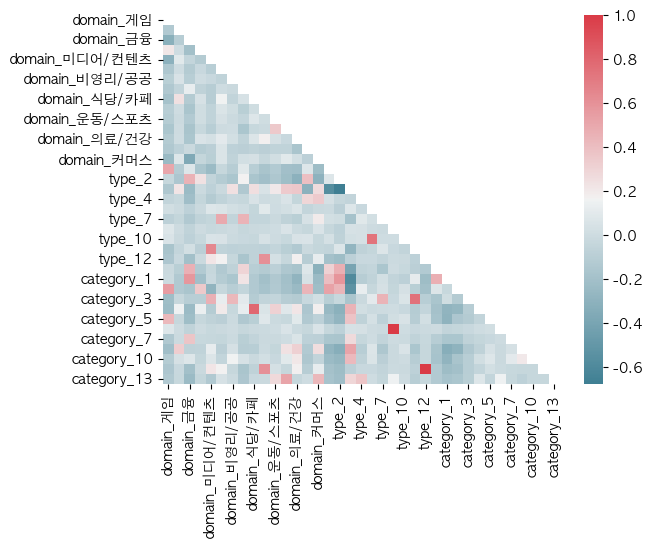

In [268]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap = cmap)

In [66]:
look_scale

,mda_idx,ads_idx,user_ip,dvc_idx,ads_scale_index,dvc_scale_index
0,12,24,41747,75700,2,3
1,14,59,33285,31834,3,3
2,18,23,3244,2825,2,2
3,22,166,23495,37668,3,3
4,26,19,418,402,2,1
...,...,...,...,...,...,...
184,1050,1,1,1,1,1
185,1051,1,1,1,1,1
186,1055,2,2,1,1,1
187,1059,1,5,1,1,1


In [272]:
scale_features2

,mda_idx,contract_price_mean,contract_price_median,contract_price_sum,contract_price_max,contract_price_min,media_price_mean,ads_idx_nunique
0,12,538.208333,268.5,12917,2000,130,349.583333,24
1,14,4313.847458,1200.0,254517,30000,170,3027.966102,59
2,18,9394.608696,6600.0,216076,33600,1200,6832.608696,23
3,22,3954.259036,1200.0,656407,33600,150,2945.000000,166
4,26,5629.473684,4000.0,106960,20400,190,3977.368421,19
...,...,...,...,...,...,...,...,...
184,1050,16.000000,16.0,16,16,16,11.000000,1
185,1051,3.000000,3.0,3,3,3,2.000000,1
186,1055,22091.000000,22091.0,44182,29425,14757,822.500000,2
187,1059,2.000000,2.0,2,2,2,2.000000,1


In [274]:
df_plus = os_features.merge(mda_duration_stats.reset_index(), on='mda_idx', how='left')
df_plus = df_plus.merge(scale_features2[['mda_idx', 'media_price_mean']], on='mda_idx', how='left')
df_plus = df_plus.merge(look_scale[['mda_idx', 'ads_scale_index', 'dvc_scale_index']], on = 'mda_idx', how='left')
df_plus = df_plus.merge(perform_features[['mda_idx', 'earn_cost', 'cvr']], on = 'mda_idx', how = 'left')
df_plus

,mda_idx,os_type_1,os_type_2,os_type_3,os_type_7,duration_mean,duration_median,ratio_nolimit,media_price_mean,ads_scale_index,dvc_scale_index,earn_cost,cvr
0,12,0.000000,0.986173,0.000000,0.013827,736.526316,270.0,0.208333,349.583333,2,3,13176540.0,0.356818
1,14,0.248151,0.457310,0.000000,0.294539,1141.129630,1566.0,0.084746,3027.966102,3,3,7200810.0,0.271144
2,18,0.000000,0.971817,0.000000,0.028183,1710.739130,2020.0,0.000000,6832.608696,2,2,534650.0,0.041939
3,22,0.000000,0.428852,0.257981,0.313167,1553.500000,1728.5,0.265060,2945.000000,3,3,6063430.0,0.422674
4,26,0.958702,0.000000,0.000000,0.041298,1346.789474,1646.0,0.000000,3977.368421,2,1,14480.0,0.103245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1050,0.000000,0.000000,0.000000,1.000000,1601.000000,1601.0,0.000000,11.000000,1,1,11.0,1.000000
185,1051,0.000000,0.000000,0.000000,1.000000,1995.000000,1995.0,0.000000,2.000000,1,1,0.0,0.000000
186,1055,0.000000,0.000000,0.000000,1.000000,201.000000,201.0,0.000000,822.500000,1,1,0.0,0.000000
187,1059,0.000000,1.000000,0.000000,0.000000,9999.000000,9999.0,1.000000,2.000000,1,1,0.0,0.000000


<Axes: >

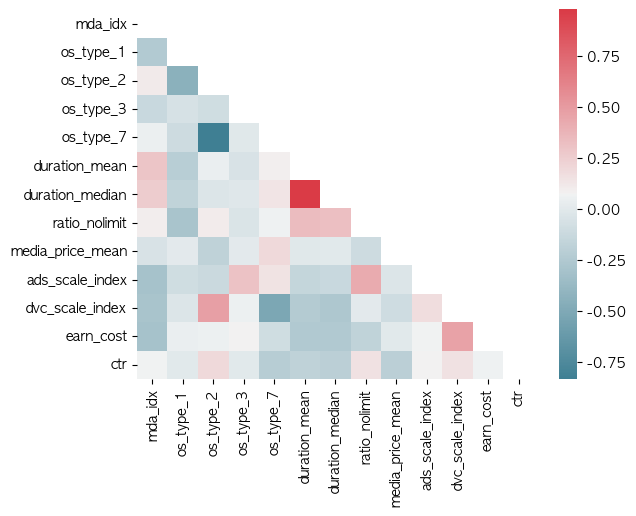

In [96]:
mask = np.zeros_like(df_plus.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_plus.corr(), mask=mask, cmap = cmap)

In [275]:
df_p_corr = df_plus.corr()
df_p_corr[df_p_corr > 0.4]

,mda_idx,os_type_1,os_type_2,os_type_3,os_type_7,duration_mean,duration_median,ratio_nolimit,media_price_mean,ads_scale_index,dvc_scale_index,earn_cost,cvr
mda_idx,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os_type_1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os_type_2,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478522,NaN,NaN
os_type_3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os_type_7,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_mean,NaN,NaN,NaN,NaN,NaN,1.000000,0.979848,NaN,NaN,NaN,NaN,NaN,NaN
duration_median,NaN,NaN,NaN,NaN,NaN,0.979848,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
ratio_nolimit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,0.42234,NaN,NaN,NaN
media_price_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ads_scale_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42234,NaN,1.00000,NaN,NaN,NaN


In [276]:
ads_time = pd.read_csv('/Users/t2023-m0052/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_time.shape}")


ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=월 ~ 6=일

def daypart(h):
    if 6 <= h < 10:  return '아침(06-10)'
    if 10 <= h < 14: return '낮(10-14)'
    if 14 <= h < 18: return '오후(14-18)'
    if 18 <= h < 22: return '저녁(18-22)'
    if 22 <= h or h < 2: return '심야(22-02)'
    return '새벽(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=월 ~ 6=일

def daypart(h):
    if 6 <= h < 10:  return '아침(06-10)'
    elif 10 <= h < 14: return '낮(10-14)'
    elif 14 <= h < 18: return '오후(14-18)'
    elif 18 <= h < 22: return '저녁(18-22)'
    elif 22 <= h or h < 2: return '심야(22-02)'
    else: return '새벽(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

summary = (
    ads_time.groupby(['mda_idx','weekday','daypart'], as_index=False)
            .agg(clicks=('rpt_time_clk','sum'),
                 turns=('rpt_time_turn','sum'))
)

summary['cvr'] = np.where(summary['clicks'] > 0,
                          summary['turns'] / summary['clicks'], 0.0)
summary = summary.replace([np.inf, -np.inf], 0.0)

best_eff = (summary.sort_values(['mda_idx','cvr'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최고 효율'))

best_clk = (summary.sort_values(['mda_idx','clicks'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최다 클릭'))

final_result = pd.concat([best_eff, best_clk], ignore_index=True)

weekday_map = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
final_result['weekday_name'] = final_result['weekday'].map(weekday_map)

eff = final_result[final_result['type']=='최고 효율'] \
        .rename(columns={'weekday_name':'weekday_name_eff',
                         'daypart':'daypart_eff',
                         'clicks':'clicks_eff',
                         'turns':'turns_eff',
                         'cvr':'cvr_eff'}) \
        [['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']]

vol = final_result[final_result['type']=='최다 클릭'] \
        .rename(columns={'weekday_name':'weekday_name_vol',
                         'daypart':'daypart_vol',
                         'clicks':'clicks_vol',
                         'turns':'turns_vol',
                         'cvr':'cvr_vol'}) \
        [['mda_idx','weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol']]




데이터 수 : (6953146, 12)


In [277]:
time_report = eff.merge(vol, on='mda_idx', how='outer')
time_report['slot_match'] = (
    (time_report['weekday_name_eff'] == time_report['weekday_name_vol']) &
    (time_report['daypart_eff'] == time_report['daypart_vol'])
)
time_report = time_report[[
    'mda_idx',
    'weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff',
    'weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol',
    'slot_match'
]].sort_values('mda_idx').reset_index(drop=True)
time_report["daypart_eff"] = time_report["daypart_eff"].str.replace(r"\(.*\)", "", regex=True).str.strip()
time_report["daypart_vol"] = time_report["daypart_vol"].str.replace(r"\(.*\)", "", regex=True).str.strip()
def change_labeling(t, x):
    week_dict = {'월':0, '화':1, '수':2, '목':3, '금':4, '토':5, '일':6}
    daypart_dict = {'아침':0, '낮':1, '오후':2, '저녁':3, '심야':4, '새벽':5}

    if t == 'weekday':
        return week_dict[x]
    elif t == 'day':
        return daypart_dict[x]
    


In [ ]:
time_report[['mda_idx', 'weekday_name_eff', 'daypart_eff']]

,mda_idx,weekday_name_eff,daypart_eff,clicks_eff,turns_eff,cvr_eff,weekday_name_vol,daypart_vol,clicks_vol,turns_vol,cvr_vol,slot_match
0,12,목,저녁,3550,1716,0.483380,토,새벽,21824,9273,0.424899,False
1,14,금,심야,5261,2125,0.403916,금,심야,5261,2125,0.403916,True
2,18,월,낮,174,15,0.086207,수,저녁,268,9,0.033582,False
3,22,금,아침,2346,1561,0.665388,일,새벽,3689,1888,0.511792,False
4,26,목,새벽,17,8,0.470588,일,아침,49,4,0.081633,False
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1051,화,심야,4,3,0.750000,화,심야,4,3,0.750000,True
187,1055,일,심야,3,0,0.000000,일,심야,3,0,0.000000,True
188,1057,수,낮,1,1,1.000000,화,저녁,2,1,0.500000,False
189,1059,금,오후,6,0,0.000000,금,오후,6,0,0.000000,True


In [286]:
df_plus = df_plus.merge(time_report[['mda_idx', 'weekday_name_eff', 'daypart_eff']], on='mda_idx', how = 'left')
df_plus

,mda_idx,os_type_1,os_type_2,os_type_3,os_type_7,duration_mean,duration_median,ratio_nolimit,media_price_mean,ads_scale_index,dvc_scale_index,earn_cost,cvr,weekday_name_eff,daypart_eff
0,12,0.000000,0.986173,0.000000,0.013827,736.526316,270.0,0.208333,349.583333,2,3,13176540.0,0.356818,목,저녁
1,14,0.248151,0.457310,0.000000,0.294539,1141.129630,1566.0,0.084746,3027.966102,3,3,7200810.0,0.271144,금,심야
2,18,0.000000,0.971817,0.000000,0.028183,1710.739130,2020.0,0.000000,6832.608696,2,2,534650.0,0.041939,월,낮
3,22,0.000000,0.428852,0.257981,0.313167,1553.500000,1728.5,0.265060,2945.000000,3,3,6063430.0,0.422674,금,아침
4,26,0.958702,0.000000,0.000000,0.041298,1346.789474,1646.0,0.000000,3977.368421,2,1,14480.0,0.103245,목,새벽
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1050,0.000000,0.000000,0.000000,1.000000,1601.000000,1601.0,0.000000,11.000000,1,1,11.0,1.000000,월,저녁
185,1051,0.000000,0.000000,0.000000,1.000000,1995.000000,1995.0,0.000000,2.000000,1,1,0.0,0.000000,화,심야
186,1055,0.000000,0.000000,0.000000,1.000000,201.000000,201.0,0.000000,822.500000,1,1,0.0,0.000000,일,심야
187,1059,0.000000,1.000000,0.000000,0.000000,9999.000000,9999.0,1.000000,2.000000,1,1,0.0,0.000000,금,오후


In [287]:
df_plus['weekday_name_eff'] = df_plus['weekday_name_eff'].apply(lambda x: change_labeling('weekday', x))
df_plus['daypart_eff'] = df_plus['daypart_eff'].apply(lambda x: change_labeling('day', x))

# 클러스터링

## 1차 전체 클러스터링

In [284]:
df_plus.groupby('mda_idx')

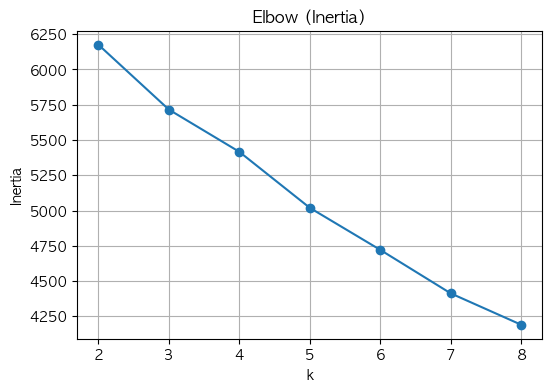

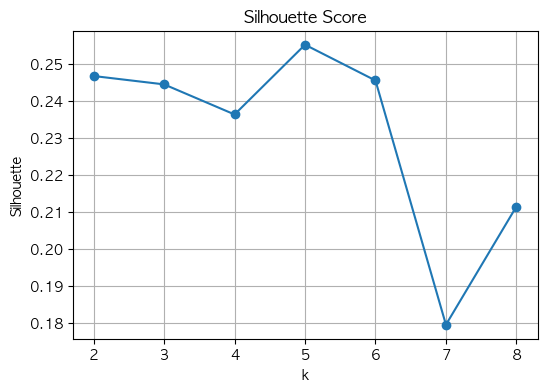

[INFO] 선택된 k = 5


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,...,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.194738,0.011297,0.169360,0.007198,0.086468,0.026067,0.016454,0.047562,0.062764,0.020371,...,0.078181,0.028395,0.192150,0.120700,0.000000,0.060603,0.246546,0.085894,0.017718,0.100888
1,0.048232,0.001028,0.205008,0.000910,0.304577,0.035048,0.108509,0.119416,0.000910,0.006283,...,0.044328,0.553226,0.024124,0.001297,0.000000,0.001119,0.024174,0.002193,0.001365,0.000000
2,0.337156,0.000643,0.279989,0.011812,0.073444,0.020974,0.007805,0.066252,0.021789,0.002601,...,0.387530,0.068203,0.004378,0.009281,0.000000,0.001644,0.050361,0.004526,0.001677,0.013979
3,0.088889,0.000000,0.000000,0.005556,0.270797,0.066169,0.000000,0.000000,0.000000,0.337817,...,0.005556,0.000000,0.000000,0.083333,0.000000,0.000000,0.027778,0.000000,0.877778,0.000000
4,0.520172,0.000858,0.030537,0.004402,0.021944,0.012979,0.012477,0.022624,0.011425,0.005130,...,0.105951,0.023401,0.051964,0.064247,0.272879,0.005340,0.043662,0.004289,0.001343,0.302559


,top_domains
cluster,
0,"type_3(84.43%), category_8(24.65%), 게임(19.47%)..."
1,"category_3(55.32%), category_1(34.45%), type_2..."
2,"type_2(45.95%), category_2(38.75%), category_1..."
3,"type_12(87.78%), category_11(87.78%), 식음료(33.7..."
4,"type_3(53.01%), 게임(52.02%), category_13(30.26%..."


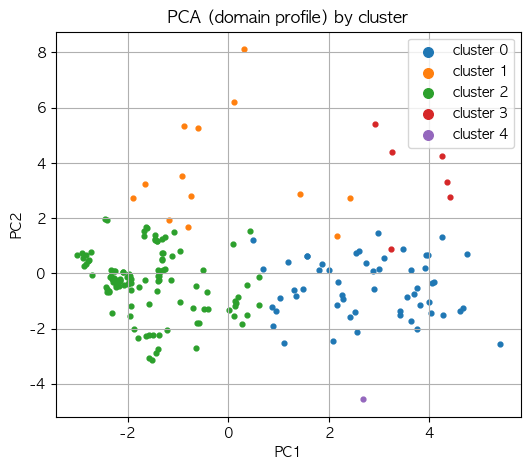

[DONE] mda_idx 클러스터링 완료


In [280]:
# ----------------------------------
# 0) 데이터 준비
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() 결과라고 가정
# 예시) domain_features.head()
# index = mda_idx, columns = ["domain_게임", "domain_교육", ...]

df1 = df.copy()
# 결측치/무한대 정리
df1 = df1.replace([np.inf, -np.inf], np.nan).fillna(0)

# (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
# row_sum = df.sum(axis=1)
# row_sum[row_sum == 0] = 1  # 0 division 방지
# df_ratio = df.div(row_sum, axis=0)

# # (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
# var = df_ratio.var(axis=0)
# keep_cols = var[var > 0].index
# X = df_ratio[keep_cols].values

X = df1.copy()

# 1) 스케일링
scaler = StandardScaler()  # 혹은 MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2) k 값 탐색 (엘보 & 실루엣)
ks = range(2, 9)  # 2~8개 군집 범위 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 엘보 그래프
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 실루엣 그래프 (값이 클수록 분리가 잘됨)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) 최종 KMeans 학습 (실루엣/엘보 보고 k 선택)
best_k = int(ks[int(np.argmax(sil_scores))])  # 실루엣 최고 k 자동 선택
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df.index, columns=df.columns)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # 클러스터별 평균 분포 (수치)
display(top_table)                   # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) 결과 저장 (선택)
# mda_idx별 클러스터 라벨
# result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# # 클러스터별 도메인 분포(평균)
# cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
# top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print("[DONE] mda_idx 클러스터링 완료")


In [283]:
df.merge(result, on = 'mda_idx', how = 'left').to_csv('cluster_result2.csv', index= True)

## PCA

In [90]:
# 주성분 분석
pca = PCA(n_components=5) # 데이터의 처음 5개의 주성분
pca.fit(df)
df_pca = pca.transform(df)  # 처음 5개의 주성분을

# 새로운 데이터 형태 확인
print('원본 데이터 형태:', str(df.shape)) # 원본 데이터셋의
print('축소된 데이터 형태:', str(df_pca.shape))  # 주성분


print('PCA 주성분 형태:', pca.components_.shape)
print('PCA 주성분:', pca.components_) # 행: 주성분, 중요도에 따라 정렬 / 열: 원본 데이터의 '변수'에 대응하는 값

print('각 주성분의 분산 비율:', pca.explained_variance_ratio_) # 각 주성분이 원본 데이터를 얼마나 설명하는가?

원본 데이터 형태: (189, 37)
축소된 데이터 형태: (189, 5)
PCA 주성분 형태: (5, 37)
PCA 주성분: [[-1.18462675e-01  1.13227427e-02 -1.52603588e-01 -3.14737044e-03
   1.70067510e-02  6.04907165e-03  3.10362805e-02 -1.88347183e-02
   3.81603079e-02  2.81549814e-02  1.48923770e-02  6.21666927e-02
   4.27556139e-02 -7.32454885e-02  1.14749021e-01 -2.68608709e-01
  -3.94601925e-01  6.70011343e-01 -3.09942034e-05  5.20843630e-04
  -1.21225247e-02  2.12242408e-03  6.66646758e-04 -3.74920248e-02
   3.95349200e-02 -5.64305069e-02 -3.11167164e-01 -2.69570021e-01
  -1.73607356e-02  1.67417092e-01  8.89194281e-02  2.02308168e-03
   4.18475646e-02  1.82355201e-01  6.12612732e-02  3.95349200e-02
   7.11698677e-02]
 [ 6.02646379e-01 -3.16579114e-03 -4.01079500e-01  2.39900741e-02
  -1.58420181e-01 -1.76195639e-03 -2.73933747e-03 -3.29389809e-02
  -7.86925047e-03 -2.06544431e-03 -1.22103324e-03 -6.66174281e-03
  -6.83132976e-04 -7.22932007e-04 -7.30717066e-03  3.09355122e-01
  -2.43026478e-01  3.38144438e-02  1.00029113e-02  3

Text(0, 0.5, '주성분')

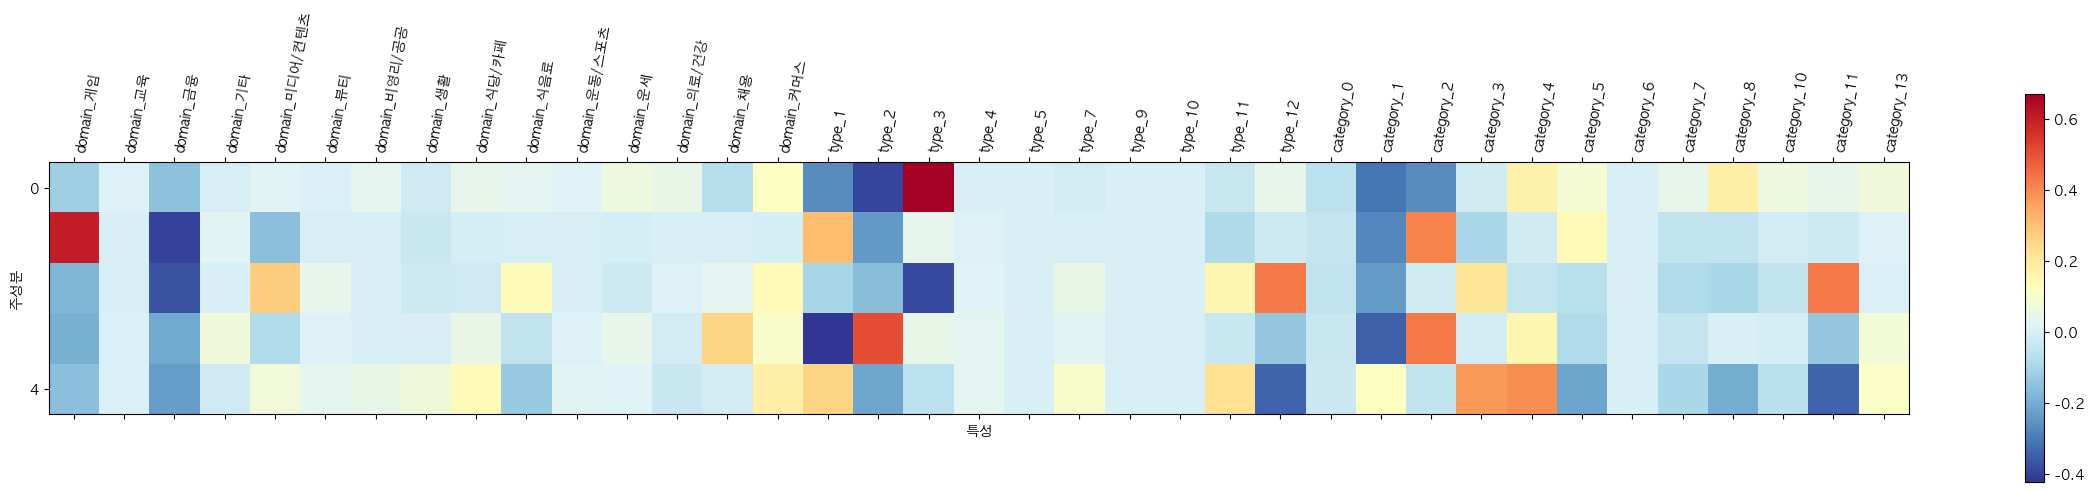

In [91]:
# 히트맵으로 주성분과 변수와의 상관관계를 시각화하기
# 어떤 특성(변수) 정보가 각각의 주성분과의 연관성이 높은지 확인
plt.figure(figsize=(30, 5))    # 히트맵 사이즈 설정
plt.matshow(pca.components_, cmap = 'RdYlBu_r', fignum=1)  # 행렬
plt.yticks([0, 4])    # 세로축 축 값 표기
plt.colorbar()    # orentation = 'horizontal, 상관계수 bar 그리기
plt.xticks(range(len(df.columns)), df.columns, rotation = 80, ha = 'left')
plt.xlabel('특성')
plt.ylabel('주성분')

In [94]:
pd.concat([df_plus, pd.DataFrame(df_pca)], axis= 1)

,mda_idx,os_type_1,os_type_2,os_type_3,os_type_7,duration_mean,duration_median,ratio_nolimit,media_price_mean,ads_scale_index,dvc_scale_index,earn_cost,ctr,0,1,2,3,4
0,12,0.000000,0.986173,0.000000,0.013827,736.526316,270.0,0.208333,349.583333,2,3,13176540.0,0.356818,-0.327702,0.784424,-0.026869,-0.282811,0.110869
1,14,0.248151,0.457310,0.000000,0.294539,1141.129630,1566.0,0.084746,3027.966102,3,3,7200810.0,0.271144,0.065743,0.293726,0.098863,-0.172556,0.089686
2,18,0.000000,0.971817,0.000000,0.028183,1710.739130,2020.0,0.000000,6832.608696,2,2,534650.0,0.041939,0.856034,0.279388,-0.249256,-0.170708,-0.319330
3,22,0.000000,0.428852,0.257981,0.313167,1553.500000,1728.5,0.265060,2945.000000,3,3,6063430.0,0.422674,-0.036645,0.368866,0.029381,-0.065555,0.018302
4,26,0.958702,0.000000,0.000000,0.041298,1346.789474,1646.0,0.000000,3977.368421,2,1,14480.0,0.103245,0.095947,0.468864,-0.090323,0.262244,-0.228636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1050,0.000000,0.000000,0.000000,1.000000,1601.000000,1601.0,0.000000,11.000000,1,1,11.0,1.000000,1.067779,-0.096651,-0.184505,0.079462,-0.192062
185,1051,0.000000,0.000000,0.000000,1.000000,1995.000000,1995.0,0.000000,2.000000,1,1,0.0,0.000000,0.393627,0.286966,-0.479957,-0.502869,-0.046448
186,1055,0.000000,0.000000,0.000000,1.000000,201.000000,201.0,0.000000,822.500000,1,1,0.0,0.000000,0.249322,-0.281011,1.458306,-0.371755,-0.553266
187,1059,0.000000,1.000000,0.000000,0.000000,9999.000000,9999.0,1.000000,2.000000,1,1,0.0,0.000000,-0.544993,0.562507,-0.194382,-0.972633,0.269851


In [289]:
cluter_df.shape

(365, 52)

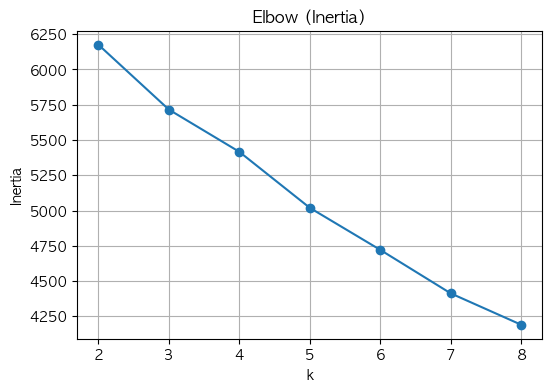

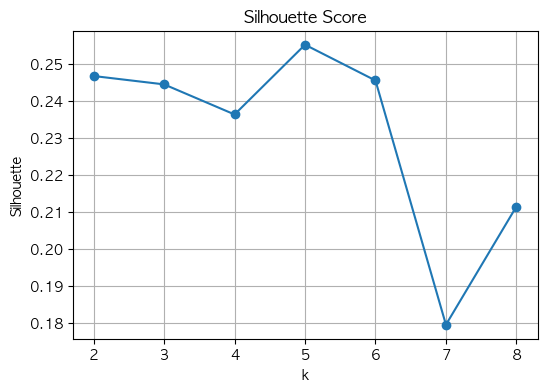

[INFO] 선택된 k = 5


,mda_idx,os_type_1,os_type_2,os_type_3,os_type_7,duration_mean,duration_median,ratio_nolimit,media_price_mean,ads_scale_index,...,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
cluster,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.607866,0.046221,0.000000,0.025117,0.0,0.007709,0.069322,0.148697,0.000000,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.352484,0.017492,0.000179,0.099188,0.0,0.035060,0.183660,0.047602,0.084624,0.035208
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.269988,0.250451,0.000000,0.123002,0.0,0.000283,0.150455,0.003374,0.000000,0.000000


,top_domains
cluster,
0,"type_2(67.48%), category_2(60.79%), 채용(35.73%)..."
1,"mda_idx(nan%), os_type_1(nan%), os_type_2(nan%..."
2,"게임(50.29%), type_3(41.51%), type_1(38.93%), ca..."
3,"mda_idx(nan%), os_type_1(nan%), os_type_2(nan%..."
4,"게임(45.85%), type_1(36.63%), type_3(30.81%), ca..."


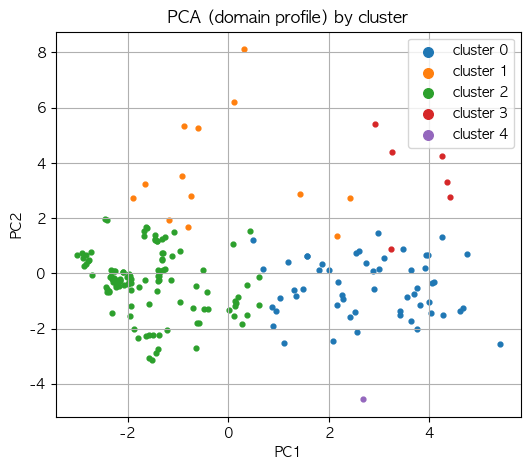

[DONE] mda_idx 클러스터링 완료


In [291]:
# ----------------------------------
# 0) 데이터 준비
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() 결과라고 가정
# 예시) domain_features.head()
# index = mda_idx, columns = ["domain_게임", "domain_교육", ...]

cluter_df = df_plus.merge(df, on = 'mda_idx', how = 'left')
# 결측치/무한대 정리
cluter_df = cluter_df.replace([np.inf, -np.inf], np.nan).fillna(0)

# (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
# row_sum = df.sum(axis=1)
# row_sum[row_sum == 0] = 1  # 0 division 방지
# df_ratio = df.div(row_sum, axis=0)

# # (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
# var = df_ratio.var(axis=0)
# keep_cols = var[var > 0].index
# X = df_ratio[keep_cols].values

# 1) 스케일링
scaler = StandardScaler()  # 혹은 MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2) k 값 탐색 (엘보 & 실루엣)
ks = range(2, 9)  # 2~8개 군집 범위 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 엘보 그래프
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 실루엣 그래프 (값이 클수록 분리가 잘됨)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) 최종 KMeans 학습 (실루엣/엘보 보고 k 선택)
best_k = int(ks[int(np.argmax(sil_scores))])  # 실루엣 최고 k 자동 선택
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=cluter_df.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=cluter_df.index, columns=cluter_df.columns)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # 클러스터별 평균 분포 (수치)
display(top_table)                   # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) 결과 저장 (선택)
# mda_idx별 클러스터 라벨
# result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# # 클러스터별 도메인 분포(평균)
# cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
# top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print("[DONE] mda_idx 클러스터링 완료")


In [306]:
pd.set_option('display.max_columns', 70)

In [298]:
pd.concat([cluter_df, result], axis=1).groupby('cluster').size()

cluster
0     55
1     13
2    114
3      6
4      1
dtype: int64

In [299]:
cluter_df.columns

Index(['mda_idx', 'os_type_1', 'os_type_2', 'os_type_3', 'os_type_7',
       'duration_mean', 'duration_median', 'ratio_nolimit', 'media_price_mean',
       'ads_scale_index', 'dvc_scale_index', 'earn_cost', 'cvr',
       'weekday_name_eff', 'daypart_eff', 'domain_게임', 'domain_교육',
       'domain_금융', 'domain_기타', 'domain_미디어/컨텐츠', 'domain_뷰티',
       'domain_비영리/공공', 'domain_생활', 'domain_식당/카페', 'domain_식음료',
       'domain_운동/스포츠', 'domain_운세', 'domain_의료/건강', 'domain_채용', 'domain_커머스',
       'type_1', 'type_2', 'type_3', 'type_4', 'type_5', 'type_7', 'type_9',
       'type_10', 'type_11', 'type_12', 'category_0', 'category_1',
       'category_2', 'category_3', 'category_4', 'category_5', 'category_6',
       'category_7', 'category_8', 'category_10', 'category_11',
       'category_13'],
      dtype='object')

In [ ]:
(
    pd.concat([cluter_df, result], axis=1)
      .groupby("cluster")[["ads_scale_index", "dvc_scale_index"]]
      .agg(lambda x: x.mode())  # 여러 최빈값이 나오면 첫 번째만
)



,ads_scale_index,dvc_scale_index
cluster,,
0,1,1
1,1,1
2,2,2
3,1,1
4,4,2


In [307]:
pd.concat([cluter_df, result], axis=1).groupby('cluster').mean()

,mda_idx,os_type_1,os_type_2,os_type_3,os_type_7,duration_mean,duration_median,ratio_nolimit,media_price_mean,ads_scale_index,dvc_scale_index,earn_cost,cvr,weekday_name_eff,daypart_eff,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스,type_1,type_2,type_3,type_4,type_5,type_7,type_9,type_10,type_11,type_12,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,605.909091,0.094515,0.268819,0.011035,0.625631,1838.014364,1904.309091,0.345108,5033.032367,2.181818,1.254545,6.416914e+05,0.278739,2.236364,2.109091,0.194738,0.011297,0.169360,0.007198,0.086468,0.026067,0.016454,0.047562,0.062764,0.020371,0.016777,0.079537,0.054898,0.019319,0.187191,0.049402,0.067501,0.844254,0.008631,0.001471,0.006653,0.000000,0.003834,0.000536,0.017718,0.006252,0.062673,0.078181,0.028395,0.192150,0.120700,0.000000,0.060603,0.246546,0.085894,0.017718,0.100888
1,886.076923,0.003583,0.508728,0.001639,0.486050,2200.403846,2205.884615,0.214585,467.727703,1.230769,1.153846,3.822354e+04,0.487878,1.076923,3.000000,0.048232,0.001028,0.205008,0.000910,0.304577,0.035048,0.108509,0.119416,0.000910,0.006283,0.001365,0.000000,0.005972,0.000000,0.162741,0.049378,0.343124,0.166333,0.000000,0.000000,0.142870,0.000000,0.000000,0.296929,0.001365,0.003641,0.344533,0.044328,0.553226,0.024124,0.001297,0.000000,0.001119,0.024174,0.002193,0.001365,0.000000
2,699.903509,0.062364,0.805182,0.013455,0.118998,1736.797269,1637.697368,0.404035,665.902811,1.912281,1.921053,1.628699e+06,0.440388,3.394737,3.842105,0.337156,0.000643,0.279989,0.011812,0.073444,0.020974,0.007805,0.066252,0.021789,0.002601,0.000186,0.005309,0.004607,0.107335,0.060096,0.374982,0.459485,0.093894,0.009895,0.000093,0.019518,0.000000,0.001012,0.039444,0.001677,0.071608,0.386813,0.387530,0.068203,0.004378,0.009281,0.000000,0.001644,0.050361,0.004526,0.001677,0.013979
3,815.666667,0.005556,0.005556,0.000000,0.988889,2454.948413,2387.166667,0.553855,9065.846614,1.833333,1.000000,1.855344e+06,0.071753,2.166667,3.333333,0.088889,0.000000,0.000000,0.005556,0.270797,0.066169,0.000000,0.000000,0.000000,0.337817,0.008739,0.000000,0.081771,0.000000,0.140263,0.005556,0.005556,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.877778,0.000000,0.005556,0.005556,0.000000,0.000000,0.083333,0.000000,0.000000,0.027778,0.000000,0.877778,0.000000
4,270.000000,0.000000,0.469406,0.045572,0.485023,1659.164444,1878.000000,0.750139,595.882843,4.000000,2.000000,2.363817e+06,0.478177,0.000000,0.000000,0.520172,0.000858,0.030537,0.004402,0.021944,0.012979,0.012477,0.022624,0.011425,0.005130,0.004596,0.100820,0.012558,0.007557,0.231919,0.124367,0.024291,0.530092,0.022446,0.000275,0.008674,0.286278,0.001845,0.000388,0.001343,0.039390,0.084977,0.105951,0.023401,0.051964,0.064247,0.272879,0.005340,0.043662,0.004289,0.001343,0.302559


In [296]:
pd.concat([cluter_df, result], axis=1).groupby('cluster').mean().to_csv('cluster_result3.csv', index = True)

<Axes: >

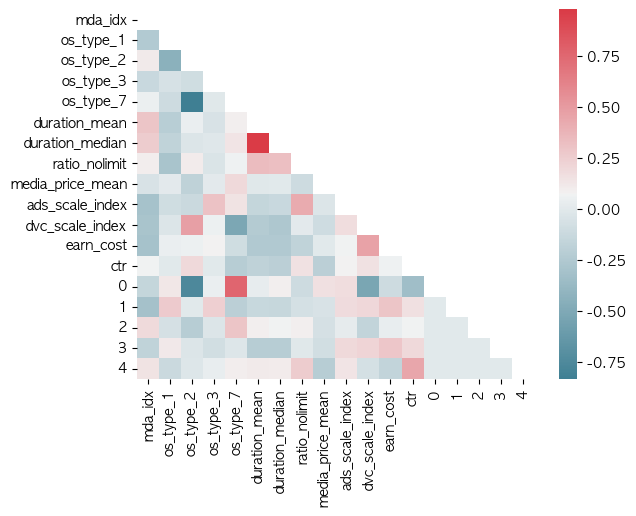

In [101]:
mask = np.zeros_like(cluter_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cluter_df.corr(), mask=mask, cmap = cmap)

In [102]:
cluter_df.corr()[cluter_df.corr() >= 0.5]

,mda_idx,os_type_1,os_type_2,os_type_3,os_type_7,duration_mean,duration_median,ratio_nolimit,media_price_mean,ads_scale_index,dvc_scale_index,earn_cost,ctr,0,1,2,3,4
mda_idx,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os_type_1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os_type_2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os_type_3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os_type_7,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764387,NaN,NaN,NaN,NaN
duration_mean,NaN,NaN,NaN,NaN,NaN,1.000000,0.979848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_median,NaN,NaN,NaN,NaN,NaN,0.979848,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ratio_nolimit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
media_price_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ads_scale_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


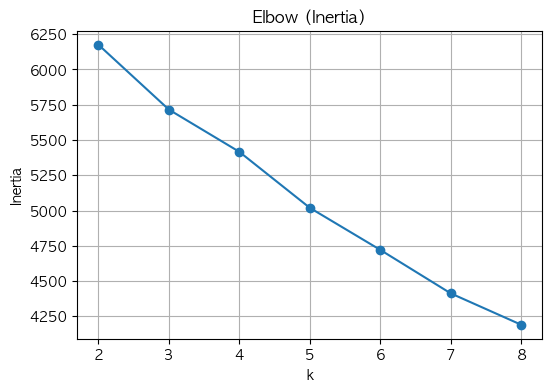

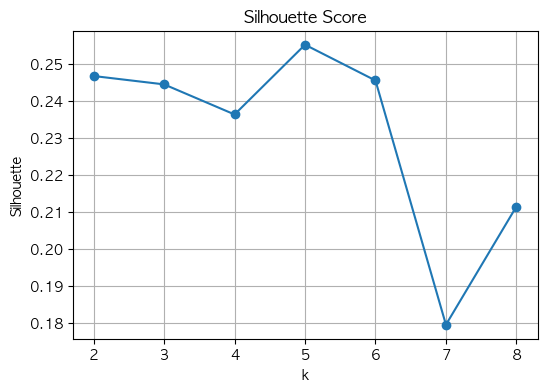

[INFO] 선택된 k = 5


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,...,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.064913,0.003766,0.056453,0.002399,0.028823,0.008689,0.005485,0.015854,0.020921,0.006790,...,0.026060,0.009465,0.064050,0.040233,0.00000,0.020201,0.082182,0.028631,0.005906,0.033629
1,0.016077,0.000343,0.068336,0.000303,0.101526,0.011683,0.036170,0.039805,0.000303,0.002094,...,0.014776,0.184409,0.008041,0.000432,0.00000,0.000373,0.008058,0.000731,0.000455,0.000000
2,0.112385,0.000214,0.093330,0.003937,0.024481,0.006991,0.002602,0.022084,0.007263,0.000867,...,0.129177,0.022734,0.001459,0.003094,0.00000,0.000548,0.016787,0.001509,0.000559,0.004660
3,0.029630,0.000000,0.000000,0.001852,0.090266,0.022056,0.000000,0.000000,0.000000,0.112606,...,0.001852,0.000000,0.000000,0.027778,0.00000,0.000000,0.009259,0.000000,0.292593,0.000000
4,0.173391,0.000286,0.010179,0.001467,0.007315,0.004326,0.004159,0.007541,0.003808,0.001710,...,0.035317,0.007800,0.017321,0.021416,0.09096,0.001780,0.014554,0.001430,0.000448,0.100853


,top_domains
cluster,
0,"type_3(28.14%), category_8(8.22%), 게임(6.49%), ..."
1,"category_3(18.44%), category_1(11.48%), type_2..."
2,"type_2(15.32%), category_2(12.92%), category_1..."
3,"type_12(29.26%), category_11(29.26%), 식음료(11.2..."
4,"type_3(17.67%), 게임(17.34%), category_13(10.09%..."


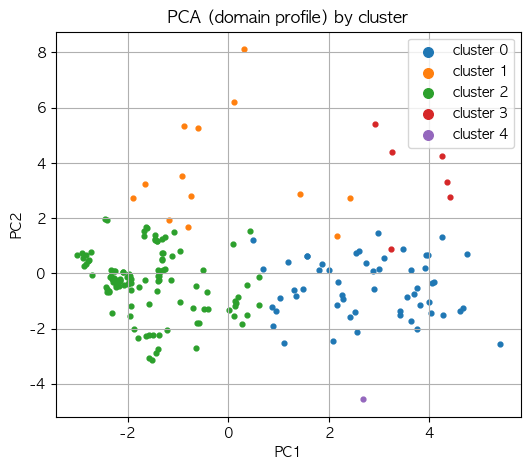

[DONE] mda_idx 클러스터링 완료


In [103]:
# ----------------------------------
# 0) 데이터 준비
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() 결과라고 가정
# 예시) domain_features.head()
# index = mda_idx, columns = ["domain_게임", "domain_교육", ...]

cluter_df = df_plus.copy()

# 결측치/무한대 정리
cluter_df = cluter_df.replace([np.inf, -np.inf], np.nan).fillna(0)

# (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
row_sum = df.sum(axis=1)
row_sum[row_sum == 0] = 1  # 0 division 방지
df_ratio = df.div(row_sum, axis=0)

# (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
var = df_ratio.var(axis=0)
keep_cols = var[var > 0].index
X = df_ratio[keep_cols].values

# 1) 스케일링
scaler = StandardScaler()  # 혹은 MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2) k 값 탐색 (엘보 & 실루엣)
ks = range(2, 9)  # 2~8개 군집 범위 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 엘보 그래프
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 실루엣 그래프 (값이 클수록 분리가 잘됨)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) 최종 KMeans 학습 (실루엣/엘보 보고 k 선택)
best_k = int(ks[int(np.argmax(sil_scores))])  # 실루엣 최고 k 자동 선택
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # 클러스터별 평균 분포 (수치)
display(top_table)                   # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) 결과 저장 (선택)
# mda_idx별 클러스터 라벨
result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# 클러스터별 도메인 분포(평균)
cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print("[DONE] mda_idx 클러스터링 완료")


# 다시 시작

## 요일/시간

In [ ]:
ads_time = pd.read_csv('/Users/t2023-m0052/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_time.shape}")


ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=월 ~ 6=일

def daypart(h):
    if 6 <= h < 10:  return '아침(06-10)'
    if 10 <= h < 14: return '낮(10-14)'
    if 14 <= h < 18: return '오후(14-18)'
    if 18 <= h < 22: return '저녁(18-22)'
    if 22 <= h or h < 2: return '심야(22-02)'
    return '새벽(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=월 ~ 6=일

def daypart(h):
    if 6 <= h < 10:  return '아침(06-10)'
    elif 10 <= h < 14: return '낮(10-14)'
    elif 14 <= h < 18: return '오후(14-18)'
    elif 18 <= h < 22: return '저녁(18-22)'
    elif 22 <= h or h < 2: return '심야(22-02)'
    else: return '새벽(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

summary = (
    ads_time.groupby(['mda_idx','weekday','daypart'], as_index=False)
            .agg(clicks=('rpt_time_clk','sum'),
                 turns=('rpt_time_turn','sum'))
)

summary['cvr'] = np.where(summary['clicks'] > 0,
                          summary['turns'] / summary['clicks'], 0.0)
summary = summary.replace([np.inf, -np.inf], 0.0)

best_eff = (summary.sort_values(['mda_idx','cvr'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최고 효율'))

best_clk = (summary.sort_values(['mda_idx','clicks'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최다 클릭'))

final_result = pd.concat([best_eff, best_clk], ignore_index=True)

weekday_map = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
final_result['weekday_name'] = final_result['weekday'].map(weekday_map)

eff = final_result[final_result['type']=='최고 효율'] \
        .rename(columns={'weekday_name':'weekday_name_eff',
                         'daypart':'daypart_eff',
                         'clicks':'clicks_eff',
                         'turns':'turns_eff',
                         'cvr':'cvr_eff'}) \
        [['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']]

vol = final_result[final_result['type']=='최다 클릭'] \
        .rename(columns={'weekday_name':'weekday_name_vol',
                         'daypart':'daypart_vol',
                         'clicks':'clicks_vol',
                         'turns':'turns_vol',
                         'cvr':'cvr_vol'}) \
        [['mda_idx','weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol']]




데이터 수 : (6953146, 12)


,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn,weekday,week_type
0,2024-07-27,0,4418,761,1,0,0,0,0,0,5,주말
1,2024-07-27,0,7377,213,1,0,0,0,0,0,5,주말
2,2024-07-27,0,7377,337,1,0,0,0,0,0,5,주말
3,2024-07-27,0,7377,496,1,1,230,230,180,180,5,주말
4,2024-07-27,0,7528,792,1,0,0,0,0,0,5,주말


In [116]:
ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=월 ~ 6=일

def daypart(h):
    if 6 <= h < 10:  return '아침(06-10)'
    if 10 <= h < 14: return '낮(10-14)'
    if 14 <= h < 18: return '오후(14-18)'
    if 18 <= h < 22: return '저녁(18-22)'
    if 22 <= h or h < 2: return '심야(22-02)'
    return '새벽(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

In [118]:
summary = (
    ads_time.groupby(['mda_idx','weekday','daypart'], as_index=False)
            .agg(clicks=('rpt_time_clk','sum'),
                 turns=('rpt_time_turn','sum'))
)

In [119]:
summary['cvr'] = np.where(summary['clicks'] > 0,
                          summary['turns'] / summary['clicks'], 0.0)
summary = summary.replace([np.inf, -np.inf], 0.0)

In [120]:
best_eff = (summary.sort_values(['mda_idx','cvr'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최고 효율'))

best_clk = (summary.sort_values(['mda_idx','clicks'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최다 클릭'))

final_result = pd.concat([best_eff, best_clk], ignore_index=True)


In [121]:
weekday_map = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
final_result['weekday_name'] = final_result['weekday'].map(weekday_map)

eff = final_result[final_result['type']=='최고 효율'] \
        .rename(columns={'weekday_name':'weekday_name_eff',
                         'daypart':'daypart_eff',
                         'clicks':'clicks_eff',
                         'turns':'turns_eff',
                         'cvr':'cvr_eff'}) \
        [['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']]

vol = final_result[final_result['type']=='최다 클릭'] \
        .rename(columns={'weekday_name':'weekday_name_vol',
                         'daypart':'daypart_vol',
                         'clicks':'clicks_vol',
                         'turns':'turns_vol',
                         'cvr':'cvr_vol'}) \
        [['mda_idx','weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol']]


In [122]:
time_report = eff.merge(vol, on='mda_idx', how='outer')

In [ ]:

time_report['slot_match'] = (
    (time_report['weekday_name_eff'] == time_report['weekday_name_vol']) &
    (time_report['daypart_eff'] == time_report['daypart_vol'])
)


In [124]:
time_report = time_report[[
    'mda_idx',
    'weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff',
    'weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol',
    'slot_match'
]].sort_values('mda_idx').reset_index(drop=True)

In [125]:
time_report["daypart_eff"] = time_report["daypart_eff"].str.replace(r"\(.*\)", "", regex=True).str.strip()
time_report["daypart_vol"] = time_report["daypart_vol"].str.replace(r"\(.*\)", "", regex=True).str.strip()


In [126]:
time_report

,mda_idx,weekday_name_eff,daypart_eff,clicks_eff,turns_eff,cvr_eff,weekday_name_vol,daypart_vol,clicks_vol,turns_vol,cvr_vol,slot_match
0,12,목,저녁,3550,1716,0.483380,토,새벽,21824,9273,0.424899,False
1,14,금,심야,5261,2125,0.403916,금,심야,5261,2125,0.403916,True
2,18,월,낮,174,15,0.086207,수,저녁,268,9,0.033582,False
3,22,금,아침,2346,1561,0.665388,일,새벽,3689,1888,0.511792,False
4,26,목,새벽,17,8,0.470588,일,아침,49,4,0.081633,False
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1051,화,심야,4,3,0.750000,화,심야,4,3,0.750000,True
187,1055,일,심야,3,0,0.000000,일,심야,3,0,0.000000,True
188,1057,수,낮,1,1,1.000000,화,저녁,2,1,0.500000,False
189,1059,금,오후,6,0,0.000000,금,오후,6,0,0.000000,True


In [129]:
time_report.daypart_eff.unique()

array(['저녁', '심야', '낮', '아침', '새벽', '오후'], dtype=object)

In [130]:
def change_labeling(t, x):
    week_dict = {'월':0, '화':1, '수':2, '목':3, '금':4, '토':5, '일':6}
    daypart_dict = {'아침':0, '낮':1, '오후':2, '저녁':3, '심야':4, '새벽':5}

    if t == 'weekday':
        return week_dict[x]
    elif t == 'day':
        return daypart_dict[x]
    

## 도메인

In [104]:
machesa.groupby(['mda_idx', 'domain']).size().unstack(fill_value=0)

domain,게임,교육,금융,기타,미디어/컨텐츠,뷰티,비영리/공공,생활,식당/카페,식음료,운동/스포츠,운세,의료/건강,채용,커머스
mda_idx,,,,,,,,,,,,,,,
12,187866,0,3971,0,53,0,7300,1479,0,643,0,0,131,0,30995
14,38866,0,3560,57,15755,5941,0,6248,0,6437,0,0,4810,888,2201
18,3315,0,914,0,1070,0,0,617,0,0,0,0,0,0,45
22,37240,16,11756,0,15966,530,4813,2867,29,1138,367,40,2462,3156,2975
26,423,0,41,0,20,0,0,115,0,0,0,0,0,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1055,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0


In [107]:
machesa['conversion'] = machesa['rwd_idx'].notnull()

In [207]:
# 도메인 관련

def add_domain_composition():
    # 전체 클릭에서 도메인 구성비
    user_domain_clicks = machesa.groupby(['mda_idx', 'domain']).size().unstack(fill_value=0)
    user_domain_ratios = user_domain_clicks.div(user_domain_clicks.sum(axis=1), axis=0)
    
    # 주요 도메인
    user_main_domain = user_domain_ratios.idxmax(axis=1)
    user_domain_concentration = user_domain_ratios.max(axis=1)  # 가장 집중한 도메인 비율
    
    # 전환이 발생한 광고의 도메인 구성비
    conversion_data = machesa[machesa['conversion'] == True]
    if len(conversion_data) > 0:
        user_conv_domain_clicks = conversion_data.groupby(['mda_idx', 'domain']).size().unstack(fill_value=0)
        user_conv_domain_ratios = user_conv_domain_clicks.div(user_conv_domain_clicks.sum(axis=1), axis=0).fillna(0)
        user_main_conv_domain = user_conv_domain_ratios.idxmax(axis=1)
    else:
        user_main_conv_domain = pd.Series(index=machesa['mda_idx'].unique(), dtype='object').fillna('None')
    
    domain_features = pd.DataFrame({
        'main_domain': user_main_domain,
        'domain_concentration': user_domain_concentration,
        'domain_diversity': user_domain_clicks.gt(0).sum(axis=1),
        'main_conversion_domain': user_main_conv_domain
    })
    
    # 주요 도메인별 비율 (상위 도메인들만)
    top_domains = user_domain_clicks.sum().nlargest(5).index
    for domain in top_domains:
        if domain in user_domain_ratios.columns:
            domain_features[f'{domain}_count'] = user_domain_ratios[domain]
    
    return domain_features, user_domain_ratios

domain_features, domain_ratios = add_domain_composition()
domain_features


,main_domain,domain_concentration,domain_diversity,main_conversion_domain,게임_count,금융_count,커머스_count,기타_count,생활_count
mda_idx,,,,,,,,,
12,게임,0.808241,8,게임,0.808241,0.017084,0.133347,0.000000,0.006363
14,게임,0.458526,10,게임,0.458526,0.041999,0.025967,0.000672,0.073711
18,게임,0.556115,5,미디어/컨텐츠,0.556115,0.153330,0.007549,0.000000,0.103506
22,게임,0.446764,14,게임,0.446764,0.141035,0.035691,0.000000,0.034395
26,게임,0.623894,5,게임,0.623894,0.060472,0.116519,0.000000,0.169617
...,...,...,...,...,...,...,...,...,...
1050,운세,1.000000,1,운세,0.000000,0.000000,0.000000,0.000000,0.000000
1051,게임,1.000000,1,NaN,1.000000,0.000000,0.000000,0.000000,0.000000
1055,미디어/컨텐츠,1.000000,1,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


In [180]:
def change_domain(x):
    domain_dict = {'게임':1, '채용':2, '의료/건강':3, '운세':4, '식음료':5, '식당/카페':6, '금융':7, '커머스':8, '운동/스포츠':9,
       '비영리/공공':10, '미디어/컨텐츠':11, '뷰티':12, '교육':13, '생활':14, '기타':15}
    return 0 if pd.isna(x) else domain_dict[x]

In [112]:
domain_features[domain_features['main_conversion_domain'].notnull() & (domain_features['main_domain'] != domain_features['main_conversion_domain'])]

,main_domain,domain_concentration,domain_diversity,main_conversion_domain,게임_ratio,금융_ratio,커머스_ratio,기타_ratio,생활_ratio
mda_idx,,,,,,,,,
18,게임,0.556115,5,미디어/컨텐츠,0.556115,0.153330,0.007549,0.000000,0.103506
73,식음료,0.400000,6,게임,0.033333,0.000000,0.066667,0.033333,0.000000
270,게임,0.520172,15,커머스,0.520172,0.030537,0.231919,0.004402,0.022624
281,게임,0.264910,13,미디어/컨텐츠,0.264910,0.176838,0.122746,0.015950,0.063107
340,금융,0.383120,8,게임,0.370412,0.383120,0.015549,0.000000,0.124766
...,...,...,...,...,...,...,...,...,...
1033,금융,0.703704,2,미디어/컨텐츠,0.000000,0.703704,0.000000,0.000000,0.000000
1036,금융,0.739130,3,미디어/컨텐츠,0.000000,0.739130,0.000000,0.000000,0.086957
1046,금융,0.362090,8,게임,0.225907,0.362090,0.024180,0.000000,0.072193


In [ ]:
# 전체 클러스터링 피처
        clustering_features = numeric_features + encoded_features + ratio_features
        
        # 사용 가능한 피처만 선택
        available_features = [col for col in clustering_features if col in clustering_data.columns]

### 다른 전처리 시도

In [148]:
domain_features[['게임_ratio', '금융_ratio', '커머스_ratio', '기타_ratio', '생활_ratio']].reset_index().drop(['mda_idx'], axis=1)

,게임_ratio,금융_ratio,커머스_ratio,기타_ratio,생활_ratio
0,0.808241,0.017084,0.133347,0.000000,0.006363
1,0.458526,0.041999,0.025967,0.000672,0.073711
2,0.556115,0.153330,0.007549,0.000000,0.103506
3,0.446764,0.141035,0.035691,0.000000,0.034395
4,0.623894,0.060472,0.116519,0.000000,0.169617
...,...,...,...,...,...
184,0.000000,0.000000,0.000000,0.000000,0.000000
185,1.000000,0.000000,0.000000,0.000000,0.000000
186,0.000000,0.000000,0.000000,0.000000,0.000000
187,1.000000,0.000000,0.000000,0.000000,0.000000


In [142]:
domain_features.reset_index().drop(['mda_idx'], axis=1)

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
0,187866,0,3971,0,53,0,7300,1479,0,643,0,0,131,0,30995
1,38866,0,3560,57,15755,5941,0,6248,0,6437,0,0,4810,888,2201
2,3315,0,914,0,1070,0,0,617,0,0,0,0,0,0,45
3,37240,16,11756,0,15966,530,4813,2867,29,1138,367,40,2462,3156,2975
4,423,0,41,0,20,0,0,115,0,0,0,0,0,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
185,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
186,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
187,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
X_scaled

array([[ 1.17471068e-01, -2.42332722e-02,  3.29630076e+00,
        -1.51603712e-01,  1.01703805e-01],
       [-4.08753730e-02, -3.57553310e-02,  8.98078171e-02,
        -1.43924480e-01,  1.04031855e+00],
       [-7.86564088e-02, -1.09933841e-01, -1.50283827e-01,
        -1.51603712e-01, -6.79514503e-02],
       [-4.26033684e-02,  1.94013024e-01,  1.76000272e-01,
        -1.51603712e-01,  3.74884193e-01],
       [-8.17298175e-02, -1.34407703e-01, -1.46497595e-01,
        -1.51603712e-01, -1.66753003e-01],
       [-8.19763704e-02, -1.15849058e-01, -1.52288302e-01,
        -1.51603712e-01, -1.86631403e-01],
       [-8.21793514e-02, -1.22801542e-01, -1.44827198e-01,
        -1.51603712e-01, -1.73444741e-01],
       [-8.04811124e-02, -8.42545079e-02,  2.22124424e-02,
        -1.51603712e-01, -5.94883691e-02],
       [-5.81032532e-02,  3.07418063e-02,  1.14306964e-01,
        -1.51603712e-01,  8.87139595e-02],
       [ 2.43871912e-01,  2.06423099e+00,  5.06404681e-01,
         2.21171368e+00

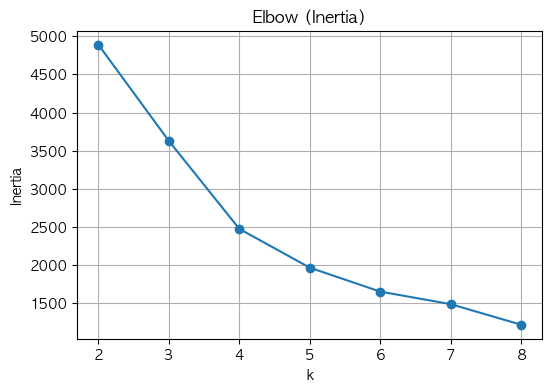

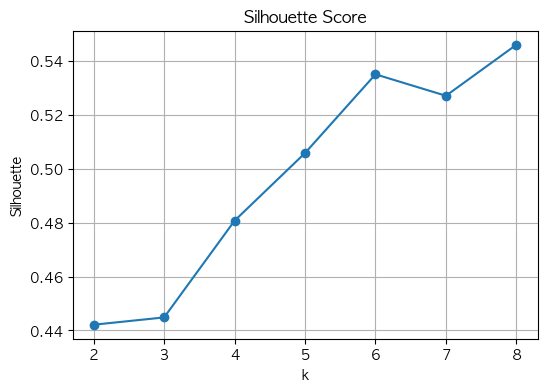

[INFO] 선택된 k = 5


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
cluster,,,,,,,,,,,,,,,
0,24072.320000,0.000000,26.800000,7103.920000,19.040000,63.680000,0.480000,26.000000,0.280000,0.960000,0.000000,0.440000,33.160000,0.520000,711.280000
1,373.864865,1.702703,988.054054,0.000000,609.135135,13.567568,164.702703,189.351351,12.189189,30.000000,1.864865,1.702703,124.648649,126.567568,531.000000
2,6748.758621,61.379310,2384.206897,574.000000,600.241379,538.551724,204.793103,3356.620690,4555.551724,473.206897,427.655172,451.068966,1389.482759,920.689655,5593.448276
3,1811.596491,0.035088,2945.666667,0.122807,897.350877,131.578947,0.175439,508.368421,205.964912,0.263158,0.017544,0.245614,160.578947,623.789474,164.719298
4,334158.707317,1.951220,15600.512195,449.512195,1492.317073,330.658537,544.365854,1168.073171,215.243902,220.731707,20.024390,727.048780,1288.170732,778.731707,1330.219512


,top_domains
cluster,
0,"게임(2407232.00%), 기타(710392.00%), 커머스(71128.00%..."
1,"금융(98805.41%), 미디어/컨텐츠(60913.51%), 커머스(53100.0..."
2,"게임(674875.86%), 커머스(559344.83%), 식당/카페(455555...."
3,"금융(294566.67%), 게임(181159.65%), 미디어/컨텐츠(89735...."
4,"게임(33415870.73%), 금융(1560051.22%), 미디어/컨텐츠(149..."


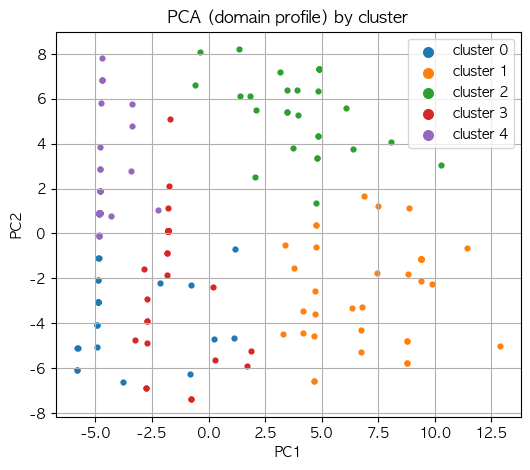

CH 지수: 152.5633534052468 지수가 높을수록 성능이 우수함을 의미)
DB 지수: 0.7775479465229476 지수가 낮을수록 클러스터링 성능 우수함을 의미)
클러스터에 따른 매체사 개수:
 cluster
3    57
4    41
1    37
2    29
0    25
Name: count, dtype: int64
[DONE] mda_idx 클러스터링 완료


In [208]:
# ----------------------------------
# 0) 데이터 준비
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() 결과라고 가정
# 예시) domain_features.head()
# index = mda_idx, columns = ["domain_게임", "domain_교육", ...]

df = domain_features.copy()

# 인코딩
df['main_domain'] = df['main_domain'].apply(change_domain)
df['main_conversion_domain'] = df['main_conversion_domain'].apply(change_domain)

# 결측치/무한대 정리
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# # (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# # 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
# row_sum = df.sum(axis=1)
# row_sum[row_sum == 0] = 1  # 0 division 방지
# df_ratio = df.div(row_sum, axis=0)

# # (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
# var = df_ratio.var(axis=0)
# keep_cols = var[var > 0].index
# X = df_ratio[keep_cols].values

# 1) 스케일링
X_scaled = df.copy()
# scaler = StandardScaler()  # 혹은 MinMaxScaler()
# X_scaled[X_scaled.filter(like='count', axis=1).columns] =  scaler.fit_transform(X_scaled.filter(like='count', axis=1))



# 2) k 값 탐색 (엘보 & 실루엣)
ks = range(2, 9)  # 2~8개 군집 범위 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 엘보 그래프
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 실루엣 그래프 (값이 클수록 분리가 잘됨)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) 최종 KMeans 학습 (실루엣/엘보 보고 k 선택)
# best_k = int(ks[int(np.argmax(sil_scores))])  # 실루엣 최고 k 자동 선택
best_k = 5
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # 클러스터별 평균 분포 (수치)
display(top_table)                   # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) 결과 저장 (선택)
# mda_idx별 클러스터 라벨
# result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# # 클러스터별 도메인 분포(평균)
# cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
# top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print('CH 지수:', calinski_harabasz_score(X_scaled, labels), '지수가 높을수록 성능이 우수함을 의미)')
print('DB 지수:', davies_bouldin_score(X_scaled, labels), '지수가 낮을수록 클러스터링 성능 우수함을 의미)')
print('클러스터에 따른 매체사 개수:\n', result['cluster'].value_counts())
print("[DONE] mda_idx 클러스터링 완료")



In [220]:
result1 = result.copy()


In [225]:
df.columns

Index(['domain_게임', 'domain_교육', 'domain_금융', 'domain_기타', 'domain_미디어/컨텐츠',
       'domain_뷰티', 'domain_비영리/공공', 'domain_생활', 'domain_식당/카페', 'domain_식음료',
       'domain_운동/스포츠', 'domain_운세', 'domain_의료/건강', 'domain_채용', 'domain_커머스',
       'type_1', 'type_2', 'type_3', 'type_4', 'type_5', 'type_7', 'type_9',
       'type_10', 'type_11', 'type_12', 'category_0', 'category_1',
       'category_2', 'category_3', 'category_4', 'category_5', 'category_6',
       'category_7', 'category_8', 'category_10', 'category_11',
       'category_13'],
      dtype='object')

In [224]:
df.merge(result1, on='mda_idx', how = 'left').groupby('cluster').mean().to_csv('cluster_result1.csv', index=False)

In [ ]:
km = KMeans(n_clusters=5, n_init=20, random_state=42)
labels = km.fit_predict(X_scaled)
print(km.inertia_)
print(silhouette_score(X_scaled, labels))
print('클러스터에 따른 매체사 개수:\n', result['cluster'].value_counts())
print("[DONE] mda_idx 클러스터링 완료")

2851.105588351331
0.4771399175589923


In [203]:
result['cluster'].value_counts()

cluster
6    44
3    40
1    37
2    28
0    24
4    14
7     1
5     1
Name: count, dtype: int64

In [184]:
calinski_harabasz_score(X_scaled, labels) # 지수가 높을수록 성능이 우수함을 의미

154.23092130412363

In [185]:
davies_bouldin_score(X_scaled, labels)

0.8114203580302695

In [ ]:
df = time_report.copy()
df['weekday_name_eff'].apply(change_labeling)

In [ ]:
time_report['weekday_name_eff']

In [154]:
domain_features

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,187866,0,3971,0,53,0,7300,1479,0,643,0,0,131,0,30995
14,38866,0,3560,57,15755,5941,0,6248,0,6437,0,0,4810,888,2201
18,3315,0,914,0,1070,0,0,617,0,0,0,0,0,0,45
22,37240,16,11756,0,15966,530,4813,2867,29,1138,367,40,2462,3156,2975
26,423,0,41,0,20,0,0,115,0,0,0,0,0,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1055,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0


In [156]:
use_cols

['domain_게임',
 'domain_교육',
 'domain_금융',
 'domain_기타',
 'domain_미디어/컨텐츠',
 'domain_뷰티',
 'domain_비영리/공공',
 'domain_생활',
 'domain_식당/카페',
 'domain_식음료',
 'domain_운동/스포츠',
 'domain_운세',
 'domain_의료/건강',
 'domain_채용',
 'domain_커머스']

In [158]:
cols = [
    'domain_게임','domain_교육','domain_금융','domain_기타','domain_미디어/컨텐츠',
    'domain_뷰티','domain_비영리/공공','domain_생활','domain_식당/카페','domain_식음료',
    'domain_운동/스포츠','domain_운세','domain_의료/건강','domain_채용','domain_커머스'
]
use_cols = [c for c in cols if c in domain_features.columns]# 결측치/무한대 정리
df = domain_features.replace([np.inf, -np.inf], np.nan).fillna(0).copy()

# (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
row_sum = df.sum(axis=1)
row_sum[row_sum == 0] = 1  # 0 division 방지
df_ratio = df.div(row_sum, axis=0)

# (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
var = df_ratio.var(axis=0)
keep_cols = var[var > 0].index
X = df_ratio[keep_cols].values
X

array([[8.08241337e-01, 0.00000000e+00, 1.70841257e-02, ...,
        5.63591151e-04, 0.00000000e+00, 1.33347387e-01],
       [4.58525536e-01, 0.00000000e+00, 4.19994573e-02, ...,
        5.67464578e-02, 1.04762691e-02, 2.59665184e-02],
       [5.56114746e-01, 0.00000000e+00, 1.53329978e-01, ...,
        0.00000000e+00, 0.00000000e+00, 7.54906895e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.66666667e-01]], shape=(189, 15))

In [159]:
# 1) 사용할 도메인 컬럼 지정
cols = [
    'domain_게임','domain_교육','domain_금융','domain_기타','domain_미디어/컨텐츠',
    'domain_뷰티','domain_비영리/공공','domain_생활','domain_식당/카페','domain_식음료',
    'domain_운동/스포츠','domain_운세','domain_의료/건강','domain_채용','domain_커머스'
]
use_cols = [c for c in cols if c in domain_features.columns]
# 2) 데이터 준비 (결측치 → 0, float 변환)
X = domain_features[use_cols].fillna(0).astype(float)
X

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,187866.0,0.0,3971.0,0.0,53.0,0.0,7300.0,1479.0,0.0,643.0,0.0,0.0,131.0,0.0,30995.0
14,38866.0,0.0,3560.0,57.0,15755.0,5941.0,0.0,6248.0,0.0,6437.0,0.0,0.0,4810.0,888.0,2201.0
18,3315.0,0.0,914.0,0.0,1070.0,0.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
22,37240.0,16.0,11756.0,0.0,15966.0,530.0,4813.0,2867.0,29.0,1138.0,367.0,40.0,2462.0,3156.0,2975.0
26,423.0,0.0,41.0,0.0,20.0,0.0,0.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1055,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
X.index

Index([  12,   14,   18,   22,   26,   30,   32,   54,   56,   58,
       ...
       1045, 1046, 1047, 1048, 1049, 1050, 1051, 1055, 1059, 1061],
      dtype='int64', name='mda_idx', length=189)

In [215]:
# 1) 사용할 도메인 컬럼 지정
cols = [ # '게임_ratio', '금융_ratio', '커머스_ratio', '기타_ratio', '생활_ratio']
    'domain_게임','domain_금융','domain_기타','domain_생활','domain_커머스'
]
use_cols = [c for c in cols if c in domain_features.columns]
# 2) 데이터 준비 (결측치 → 0, float 변환)
X = domain_features[use_cols].fillna(0).astype(float)
# 3) 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 4) k 값별 실루엣 계산
sil_scores = {}
for k in range(2, min(11, len(X))):   # k=2 ~ 10
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    if len(set(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        sil_scores[k] = score
# 5) 결과 출력
print("k별 실루엣 점수:", sil_scores)
best_k = max(sil_scores, key=sil_scores.get)
print(f"최적 k = {best_k}, silhouette = {sil_scores[best_k]:.3f}")
# 6) 그래프
plt.figure(figsize=(6,4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by k (도메인 15개)")
plt.grid(True)
plt.show()








ValueError: at least one array or dtype is required

### 부트스트랩

In [213]:
X_scaled.reset_index().iloc[:, 1:]

,main_domain,domain_concentration,domain_diversity,main_conversion_domain,게임_count,금융_count,커머스_count,기타_count,생활_count
0,1,0.808241,8,1,0.808241,0.017084,0.133347,0.000000,0.006363
1,1,0.458526,10,1,0.458526,0.041999,0.025967,0.000672,0.073711
2,1,0.556115,5,11,0.556115,0.153330,0.007549,0.000000,0.103506
3,1,0.446764,14,1,0.446764,0.141035,0.035691,0.000000,0.034395
4,1,0.623894,5,1,0.623894,0.060472,0.116519,0.000000,0.169617
...,...,...,...,...,...,...,...,...,...
184,4,1.000000,1,4,0.000000,0.000000,0.000000,0.000000,0.000000
185,1,1.000000,1,0,1.000000,0.000000,0.000000,0.000000,0.000000
186,11,1.000000,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
187,1,1.000000,1,0,1.000000,0.000000,0.000000,0.000000,0.000000


In [214]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

def clustering_stability(X, model, n_iter=10, sample_ratio=0.8):
    scores = []
    n = X.shape[0]
    
    for _ in range(n_iter):
        idx1 = np.random.choice(n, int(n*sample_ratio), replace=False)
        idx2 = np.random.choice(n, int(n*sample_ratio), replace=False)
        
        labels1 = model.fit_predict(X[idx1])
        labels2 = model.fit_predict(X[idx2])
        
        # 두 번의 결과 비교
        score = adjusted_rand_score(labels1[:min(len(labels1),len(labels2))], 
                                    labels2[:min(len(labels1),len(labels2))])
        scores.append(score)
    
    return np.mean(scores)

# 사용 예시
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
stability = clustering_stability(X_scaled.reset_index().iloc[:, 1:], kmeans)
print("Stability:", stability)


KeyError: "None of [Index([154,  98,  22,  51,  46,  11,  60,  89, 142, 133,\n       ...\n       171,  25, 173,  58, 174, 121, 176,  12, 132,  88],\n      dtype='int64', length=151)] are in the [columns]"